# Heart Disease Prediction using Logistic Regression

This notebook implements a complete machine learning pipeline for predicting heart disease using **only NumPy, Pandas, and Matplotlib**.

## Project Structure
1. **Data Loading & Preparation**
2. **Exploratory Data Analysis (EDA)**
3. **Data Preprocessing** (Train/Test Split, Normalization)
4. **Model Implementation** (Logistic Regression from scratch)
5. **Evaluation & Results**

In [2]:
# Install required libraries
%pip install numpy matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1. Load and Prepare the Dataset

The dataset contains medical records used to predict the presence or absence of heart disease. The target variable `Heart Disease` is converted to binary format:
- **1** = Presence of heart disease
- **0** = Absence of heart disease

In [4]:
# Load the dataset
df = pd.read_csv("Heart_Disease_Prediction.csv")

# Define target column
target = "Heart Disease"

# Clean and standardize target values
tar = df[target] = df[target].astype("string").str.strip().str.lower()

# Map target to binary values
mapping = {"presence": 1, "absence": 0}
df[target + "_bin"] = tar.map(mapping)

# Display first rows
print(df.head())

   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  Heart Disease_bin  
0                        3         3      presence                  1  
1                        0         7       a

##  Exploratory Data Analysis (EDA)

EDA helps us understand the dataset structure, identify patterns, detect anomalies, and make informed decisions about preprocessing.

###  Dataset Structure
First, let's examine the basic structure: number of rows, columns, data types, and memory usage.

In [5]:
# Get dataset dimensions (rows, columns)
print(f"Dataset shape: {df.shape[0]} rows × {df.shape[1]} columns")
df.shape

Dataset shape: 270 rows × 15 columns


(270, 15)

In [6]:
# Check data quality: missing values and duplicates
print("Missing values per column:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")
print(f"Duplicate rows: {df.duplicated().sum()}")

Missing values per column:
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
Heart Disease_bin          0
dtype: int64

Total missing values: 0
Duplicate rows: 0


### Distribution of Numerical Features

Histograms show the frequency distribution of each numerical variable. This helps identify:
- **Skewed distributions** that may need transformation
- **Normal vs non-normal** distributions
- **Range and spread** of values

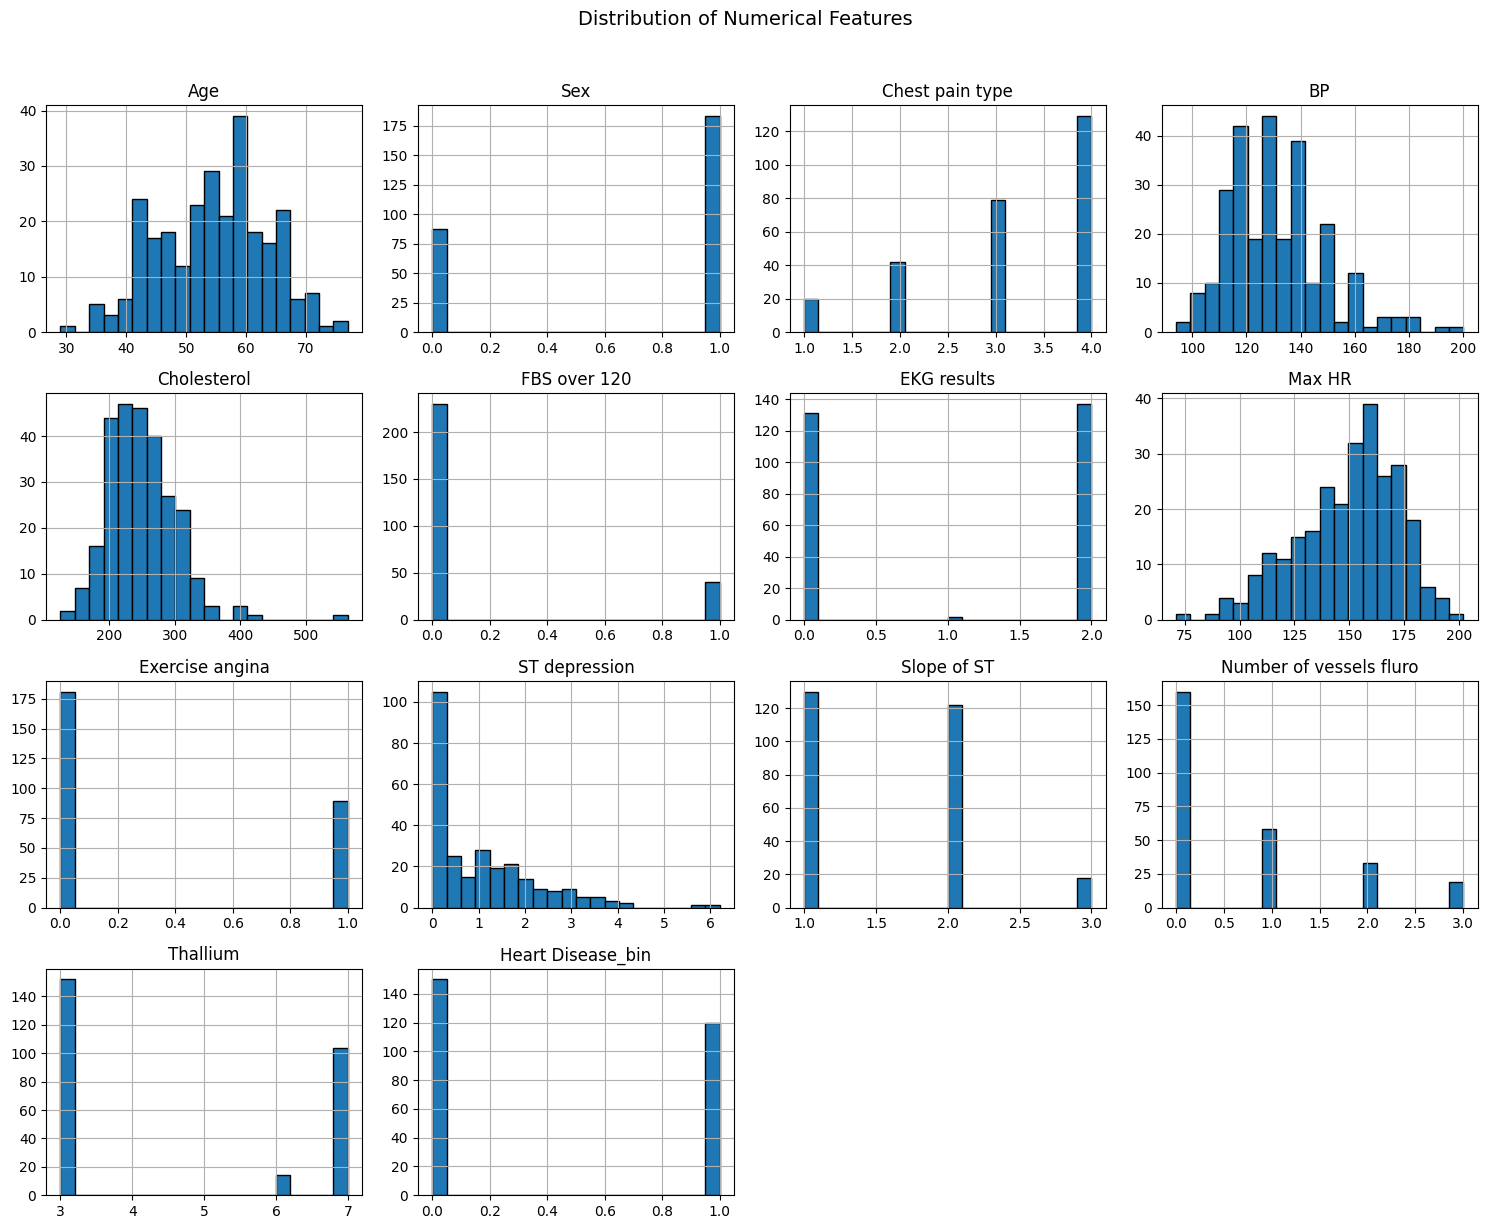

In [7]:
# Plot histograms for all numerical features
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols].hist(figsize=(15, 12), bins=20, edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

### Statistical Summary

The `describe()` method provides key statistics for each numerical column:
- **count**: Number of non-null values
- **mean**: Average value
- **std**: Standard deviation (spread of data)
- **min/max**: Range of values
- **25%, 50%, 75%**: Quartiles (data distribution)

In [8]:
# Statistical summary of numerical features (transposed for readability)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
Sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
Chest pain type,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
BP,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
FBS over 120,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
EKG results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
Max HR,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
Exercise angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
ST depression,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


### Outlier Detection with Boxplots

Boxplots visualize the distribution and identify outliers:
- **Box**: Contains 50% of data (Q1 to Q3)
- **Line inside box**: Median (Q2)
- **Whiskers**: Extend to 1.5 × IQR
- **Points outside whiskers**: Potential outliers

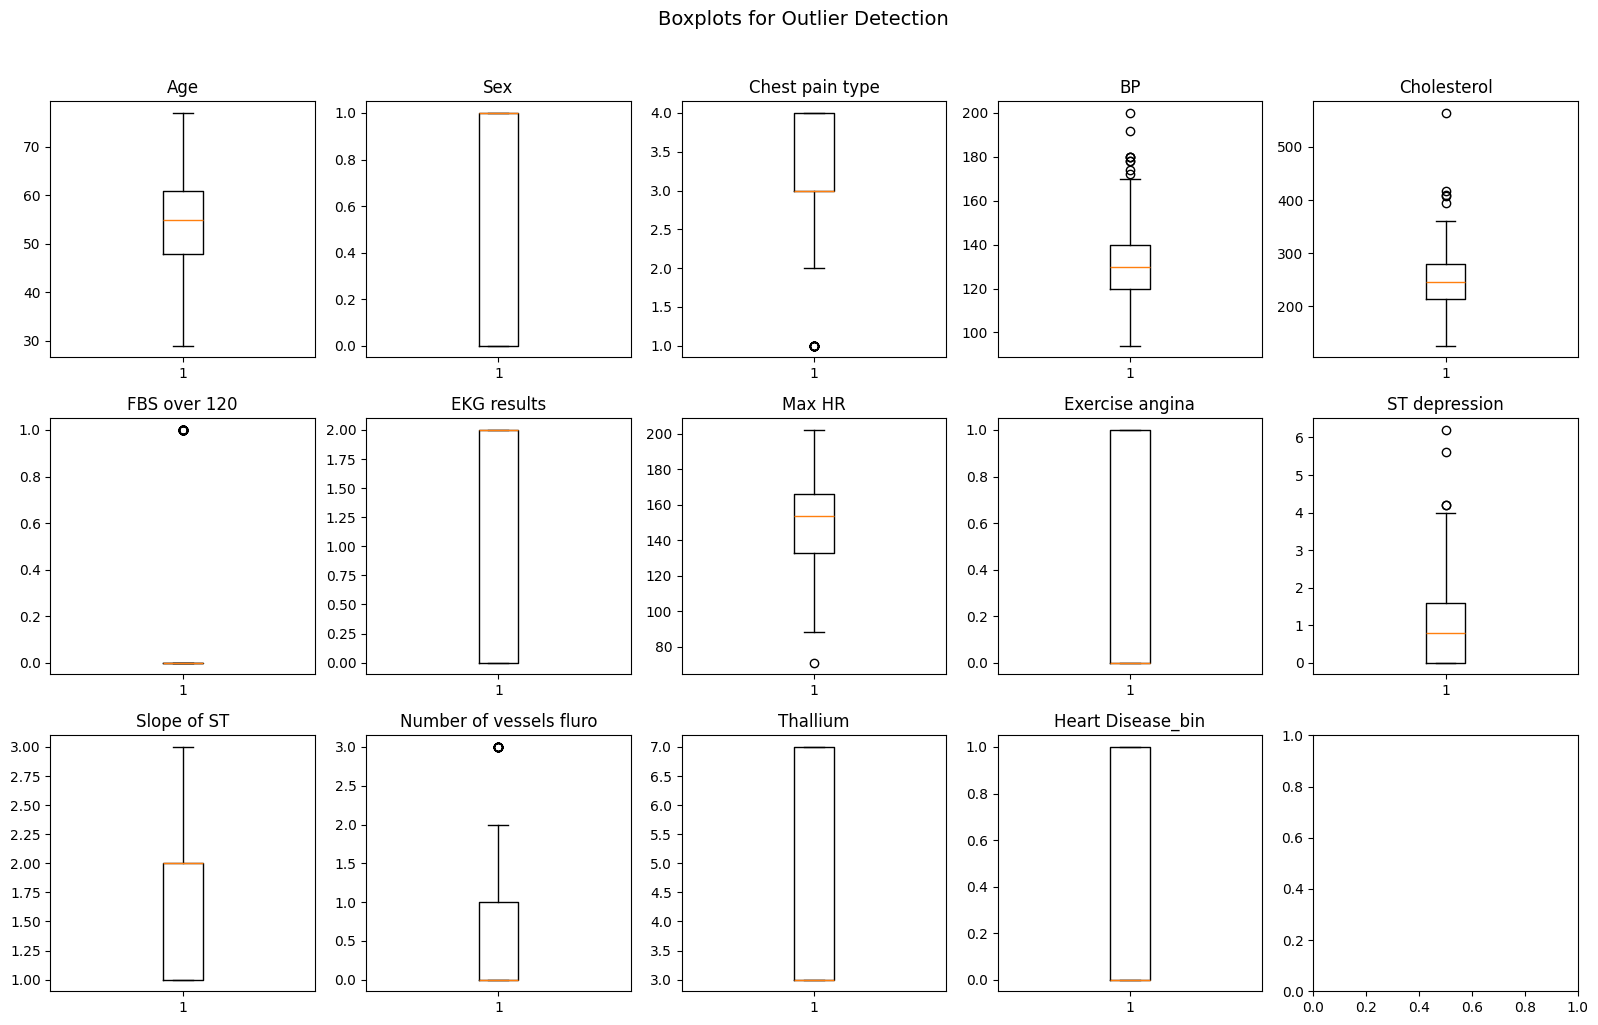

In [9]:
# Create boxplots for all numerical features to detect outliers
fig, axes = plt.subplots(3, 5, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    if i < len(axes):
        axes[i].boxplot(df[col].dropna())
        axes[i].set_title(col)

plt.suptitle("Boxplots for Outlier Detection", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

### 2.5 Correlation Analysis

The correlation matrix shows relationships between features:
- **+1**: Perfect positive correlation
- **-1**: Perfect negative correlation
- **0**: No linear relationship

This helps identify:
- **Multicollinearity** (highly correlated features)
- **Predictive features** (correlated with target)

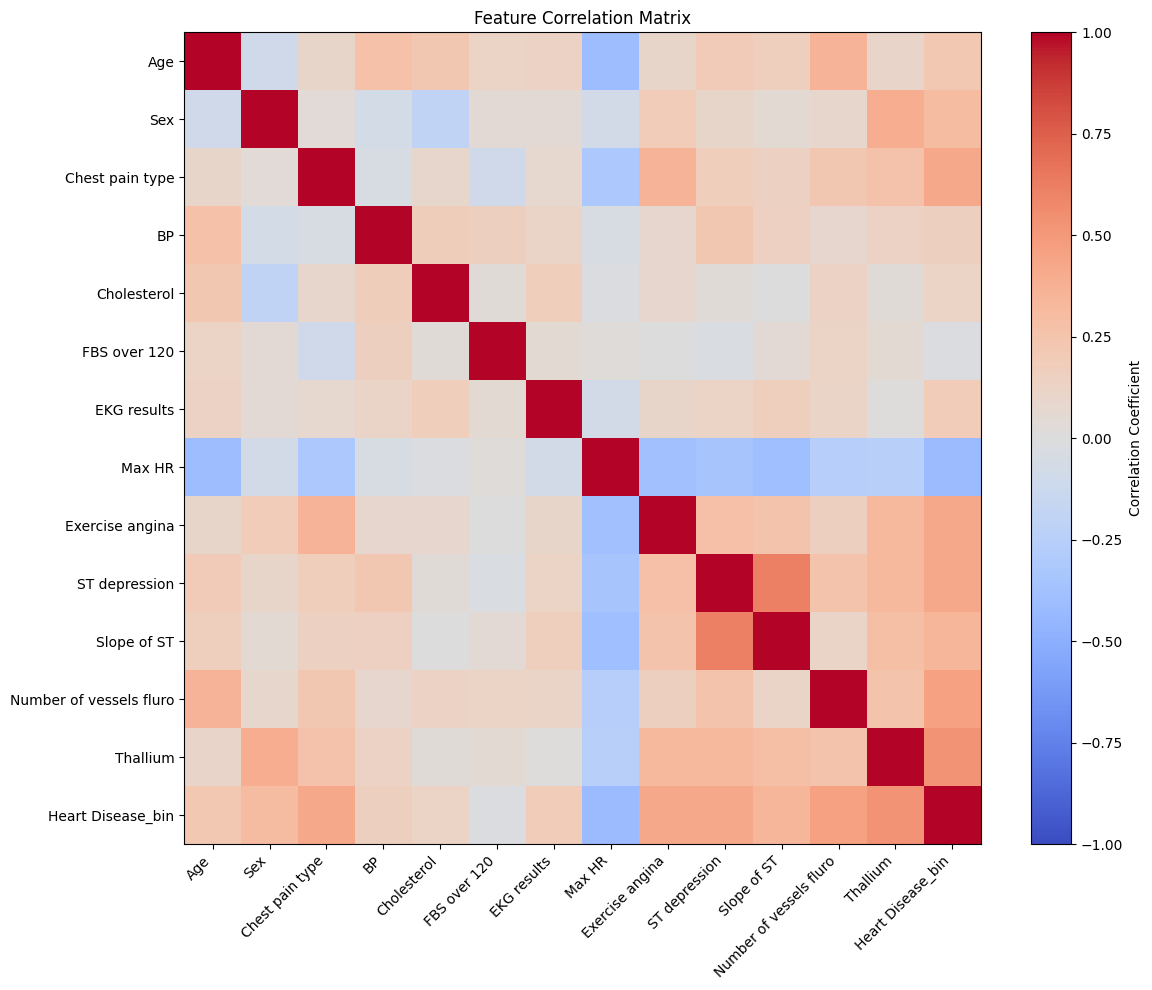

In [10]:
# Calculate and visualize correlation matrix
correlation = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
plt.imshow(correlation, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=45, ha='right')
plt.yticks(range(len(correlation.columns)), correlation.columns)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

### Correlation with Target Variable

Identifying which features are most correlated with heart disease helps with:
- **Feature selection**: Choosing the most predictive variables
- **Model interpretation**: Understanding risk factors

Feature Correlation with Heart Disease (sorted):

Thallium                   0.525020
Number of vessels fluro    0.455336
Exercise angina            0.419303
ST depression              0.417967
Chest pain type            0.417436
Slope of ST                0.337616
Sex                        0.297721
Age                        0.212322
EKG results                0.182091
BP                         0.155383
Cholesterol                0.118021
FBS over 120              -0.016319
Max HR                    -0.418514
Name: Heart Disease_bin, dtype: float64


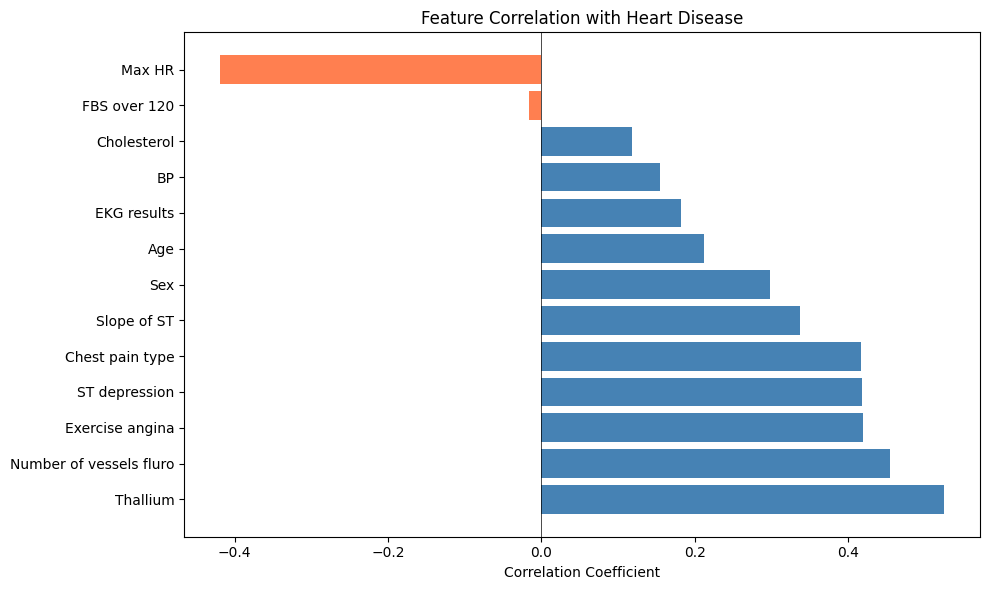

In [11]:
# Analyze correlation with target variable
target_bin = "Heart Disease_bin"
corr_target = correlation[target_bin].drop(target_bin).sort_values(ascending=False)
print("Feature Correlation with Heart Disease (sorted):\n")
print(corr_target)

# Visualize as horizontal bar chart
plt.figure(figsize=(10, 6))
colors = ['steelblue' if x > 0 else 'coral' for x in corr_target.values]
plt.barh(corr_target.index, corr_target.values, color=colors)
plt.xlabel("Correlation Coefficient")
plt.title("Feature Correlation with Heart Disease")
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

###  Categorical Features vs Target

Analyzing how categorical variables relate to heart disease presence:
- Bar charts show the **proportion** of disease for each category
- Helps identify **high-risk categories**

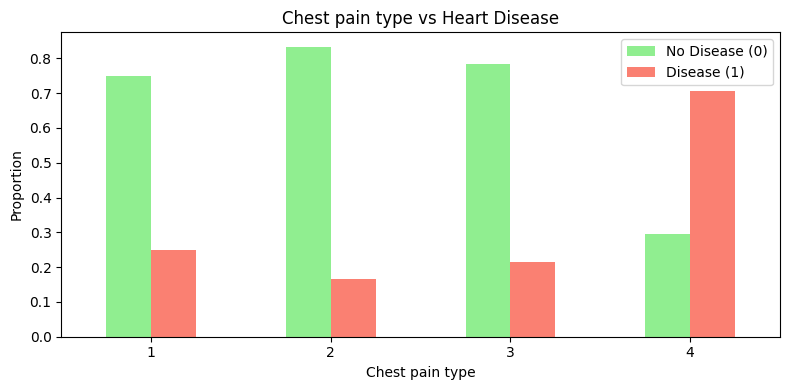

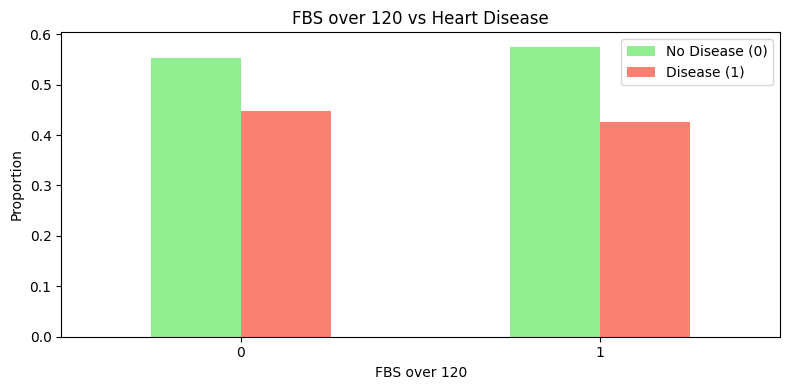

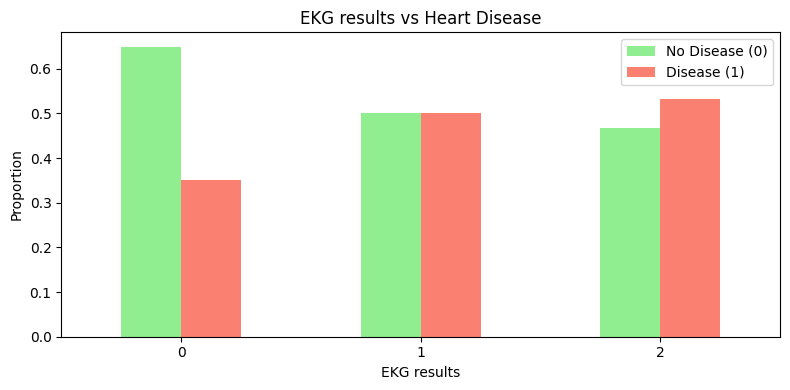

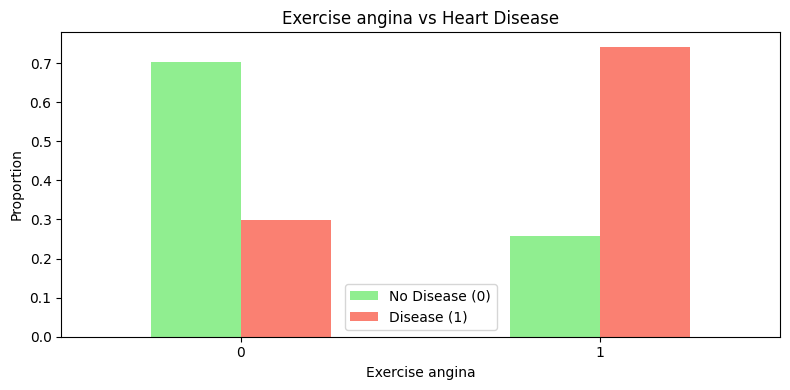

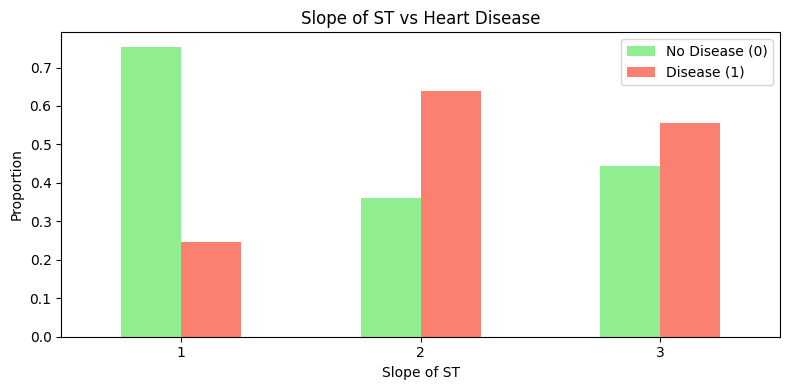

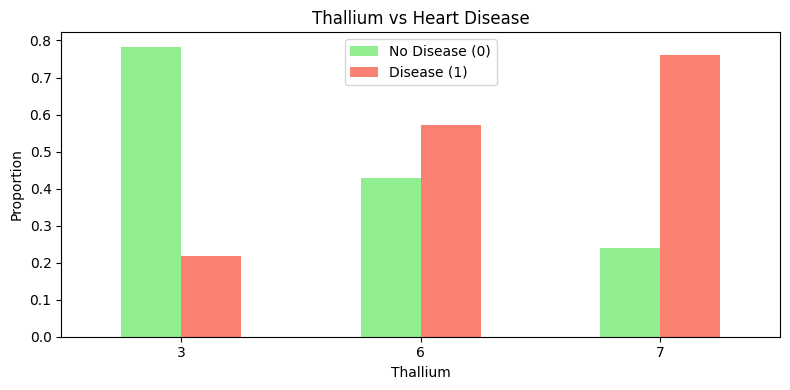

In [12]:
# Analyze categorical features vs heart disease
categorical_cols = ['Chest pain type', 'FBS over 120', 'EKG results', 'Exercise angina', 'Slope of ST', 'Thallium']

for col in categorical_cols:
    if col in df.columns:
        crosstab = pd.crosstab(df[col], df[target_bin], normalize='index')
        crosstab.plot(kind='bar', figsize=(8, 4), color=['lightgreen', 'salmon'])
        plt.title(f'{col} vs Heart Disease')
        plt.ylabel('Proportion')
        plt.xlabel(col)
        plt.legend(['No Disease (0)', 'Disease (1)'])
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.show()

### Age Distribution by Class

Comparing age distribution between patients with and without heart disease helps understand if age is a risk factor.

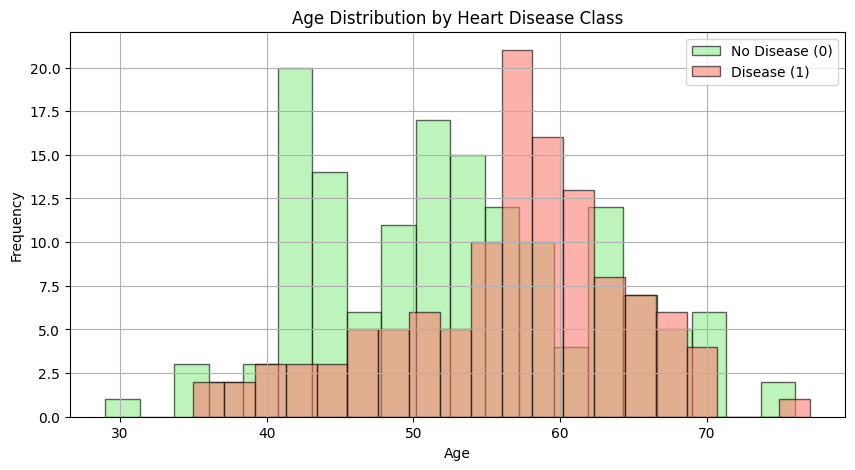

In [13]:
# Compare age distribution between classes
plt.figure(figsize=(10, 5))
df[df[target_bin] == 0]['Age'].hist(alpha=0.6, label='No Disease (0)', bins=20, color='lightgreen', edgecolor='black')
df[df[target_bin] == 1]['Age'].hist(alpha=0.6, label='Disease (1)', bins=20, color='salmon', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.title('Age Distribution by Heart Disease Class')
plt.show()

###  Target Class Distribution

Checking class balance is crucial because imbalanced datasets can lead to biased models that favor the majority class.

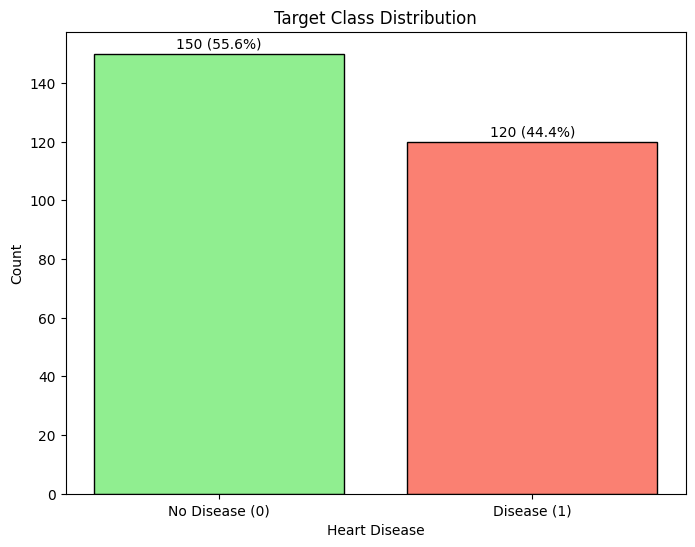


Class balance: 150 vs 120 (55.6% vs 44.4%)


In [14]:
# Visualize target class distribution
counts = df[target_bin].value_counts()
labels = ['No Disease (0)', 'Disease (1)']
values = [counts[0], counts[1]]

plt.figure(figsize=(8, 6))
bars = plt.bar([0, 1], values, color=['lightgreen', 'salmon'], edgecolor='black')
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.title("Target Class Distribution")
plt.xticks([0, 1], labels)

# Add value labels on bars
for bar, val in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, 
             f'{val} ({val/sum(values)*100:.1f}%)', ha='center', fontsize=10)

plt.show()

print(f"\nClass balance: {counts[0]} vs {counts[1]} ({counts[0]/len(df)*100:.1f}% vs {counts[1]/len(df)*100:.1f}%)")

### Disease Distribution by Sex

Analyzing heart disease prevalence by sex to understand demographic risk factors.

Heart Disease Percentage by Sex:
Heart Disease_bin      0      1
Sex                            
0                  77.01  22.99
1                  45.36  54.64


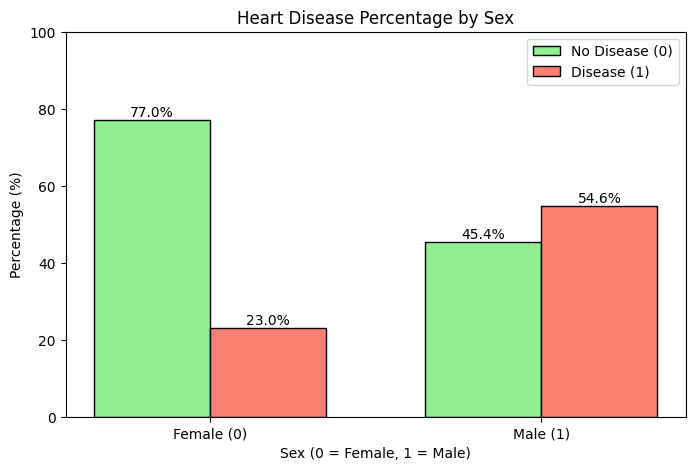

In [15]:
# Analyze disease distribution by sex
sex_crosstab = pd.crosstab(df["Sex"], df[target_bin], normalize='index') * 100
print("Heart Disease Percentage by Sex:")
print(sex_crosstab.round(2))

# Visualize
groups = sex_crosstab.index
no_disease = sex_crosstab[0].values
with_disease = sex_crosstab[1].values

x = np.arange(len(groups))
width = 0.35

plt.figure(figsize=(8, 5))
bars1 = plt.bar(x - width/2, no_disease, width=width, label="No Disease (0)", color='lightgreen', edgecolor='black')
bars2 = plt.bar(x + width/2, with_disease, width=width, label="Disease (1)", color='salmon', edgecolor='black')

plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Percentage (%)")
plt.title("Heart Disease Percentage by Sex")
plt.xticks(x, ['Female (0)', 'Male (1)'])
plt.legend()
plt.ylim(0, 100)

# Add percentage labels
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{bar.get_height():.1f}%', ha='center')
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{bar.get_height():.1f}%', ha='center')

plt.show()

### EDA Summary & Key Insights

### Dataset Overview
- **270 observations** with **16 features** (including derived target)
- **No missing values** detected in any column
- **No duplicate rows** found
- Data is clean and ready for modeling

### Class Distribution
- The target variable is **relatively balanced**:
  - **55.6%** No Heart Disease (class 0)
  - **44.4%** Heart Disease (class 1)
- No severe class imbalance requiring special techniques

### Key Correlations with Heart Disease
| Feature | Correlation | Interpretation |
|---------|-------------|----------------|
| Thallium | **+0.52** | Strong positive - higher values indicate higher risk |
| Number of vessels fluro | **+0.46** | More vessels blocked = higher risk |
| Chest pain type | **+0.42** | Certain pain types strongly associated |
| Exercise angina | **+0.40** | Presence of angina during exercise increases risk |
| ST depression | **+0.42** | Higher ST depression = higher risk |
| Max HR | **-0.43** | Lower max heart rate = higher risk |

### Demographic Insights
- **Males** show significantly higher heart disease prevalence than **females**
- Age distribution shows increased risk in the **50-65 age range**

### Outliers Detected
- Outliers present in: `Cholesterol`, `Resting BP`, `Max HR`, `Oldpeak`
- **Decision**: Keep outliers as they may represent real clinical cases

### Feature Selection for Model
Based on correlation analysis, the most predictive features selected:
1. **Thallium** (highest correlation)
2. **Number of vessels fluro**
3. **Chest pain type**
4. **Exercise angina**
5. **Sex**
6. **Age**



###  Train/Test Split (70/30 Stratified)

**Stratified splitting** ensures both train and test sets maintain the same class proportions as the original dataset. This is crucial for:
- **Fair evaluation**: Test set represents real-world distribution
- **Avoiding bias**: Neither set is skewed toward one class
- **Reproducibility**: Using a fixed seed ensures consistent results

In [16]:
# Define selected features based on correlation analysis
features = ["Thallium", "Number of vessels fluro", "Chest pain type", "Exercise angina", "Sex", "Age"]
print(f"Selected features: {features}")

Selected features: ['Thallium', 'Number of vessels fluro', 'Chest pain type', 'Exercise angina', 'Sex', 'Age']


In [17]:
def stratified_split_df(df, target_col, test_size=0.30, seed=42):
    """
    Performs stratified train/test split maintaining class proportions.
    
    Parameters:
    -----------
    df : pandas.DataFrame - Input dataframe
    target_col : str - Name of binary target column (0/1)
    test_size : float - Proportion for test set (default 0.30)
    seed : int - Random seed for reproducibility
    
    Returns:
    --------
    train_df, test_df : tuple of DataFrames
    """
    random_generator = np.random.default_rng(seed)
    
    # Get indices for each class
    presence = df.index[df[target_col] == 1].to_numpy(copy=True)
    absence = df.index[df[target_col] == 0].to_numpy(copy=True)

    # Shuffle each class separately
    random_generator.shuffle(presence)
    random_generator.shuffle(absence)

    # Calculate split sizes
    presence_test = int(round(len(presence) * test_size))
    absence_test = int(round(len(absence) * test_size))

    # Create test and train index arrays
    test = np.concatenate([absence[:absence_test], presence[:presence_test]])
    train = np.concatenate([absence[absence_test:], presence[presence_test:]])

    # Shuffle final arrays
    random_generator.shuffle(train)
    random_generator.shuffle(test)

    return df.loc[train].copy(), df.loc[test].copy()

# Perform stratified split
train, test = stratified_split_df(df, target_bin, test_size=0.30, seed=42)

# Verify stratification
print("=" * 50)
print("STRATIFIED SPLIT VERIFICATION")
print("=" * 50)
print(f"\nGlobal distribution:\n{df[target_bin].value_counts(normalize=True).round(4)}")
print(f"\nTrain distribution:\n{train[target_bin].value_counts(normalize=True).round(4)}")
print(f"\nTest distribution:\n{test[target_bin].value_counts(normalize=True).round(4)}")
print(f"\nDataset sizes:")
print(f"  Total: {len(df)} samples")
print(f"  Train: {len(train)} samples ({len(train)/len(df)*100:.1f}%)")
print(f"  Test:  {len(test)} samples ({len(test)/len(df)*100:.1f}%)")

STRATIFIED SPLIT VERIFICATION

Global distribution:
Heart Disease_bin
0    0.5556
1    0.4444
Name: proportion, dtype: float64

Train distribution:
Heart Disease_bin
0    0.5556
1    0.4444
Name: proportion, dtype: float64

Test distribution:
Heart Disease_bin
0    0.5556
1    0.4444
Name: proportion, dtype: float64

Dataset sizes:
  Total: 270 samples
  Train: 189 samples (70.0%)
  Test:  81 samples (30.0%)


### Visualize Class Balance in Train/Test Sets

Confirming that stratification preserved class proportions in both sets.

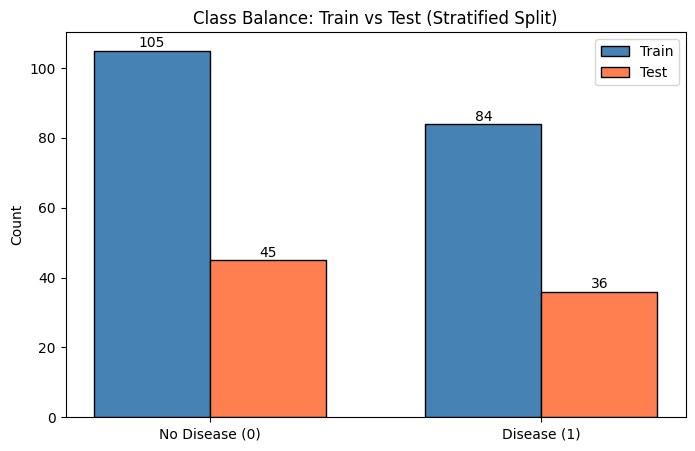

In [18]:
def plot_class_balance(train, test, target_col):
    """Visualize class distribution in train and test sets."""
    train_counts = train[target_col].value_counts().sort_index()
    test_counts = test[target_col].value_counts().sort_index()
    
    x = np.array([0, 1])
    width = 0.35

    plt.figure(figsize=(8, 5))
    bars1 = plt.bar(x - width/2, train_counts.reindex(x, fill_value=0).values, 
                    width=width, label="Train", color='steelblue', edgecolor='black')
    bars2 = plt.bar(x + width/2, test_counts.reindex(x, fill_value=0).values, 
                    width=width, label="Test", color='coral', edgecolor='black')
    
    plt.xticks([0, 1], ["No Disease (0)", "Disease (1)"])
    plt.ylabel("Count")
    plt.title("Class Balance: Train vs Test (Stratified Split)")
    plt.legend()
    
    # Add count labels
    for bar in bars1:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                 f'{int(bar.get_height())}', ha='center')
    for bar in bars2:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                 f'{int(bar.get_height())}', ha='center')
    
    plt.show()

plot_class_balance(train, test, target_bin)

###  Feature Normalization (Z-Score Standardization)

Normalizing features is essential for gradient-based algorithms like Logistic Regression.

#### Z-Score Normalization Formula

$$x' = \frac{x - \mu}{\sigma}$$

Where:
- **x** = original value
- **μ** (mu) = mean of the feature (calculated from training data only)
- **σ** (sigma) = standard deviation of the feature (calculated from training data only)
- **x'** = normalized value (z-score)

**Why normalize?**
- Ensures all features have **mean ≈ 0** and **standard deviation ≈ 1**
- Prevents features with larger scales from dominating the model
- Improves convergence speed in gradient descent optimization
- Makes model coefficients more interpretable

**Important:** We calculate μ and σ from the **training set only** and apply the same values to the test set to prevent **data leakage**.

In [19]:
# Extract features and target as numpy arrays
x_train = train[features].astype(float).to_numpy()
y_train = train[target_bin].astype(float).to_numpy()

x_test = test[features].astype(float).to_numpy()
y_test = test[target_bin].astype(float).to_numpy()

# Calculate normalization parameters from training data only
mu = x_train.mean(axis=0)
sigma = x_train.std(axis=0)

# Apply Z-score normalization
x_train_norm = (x_train - mu) / sigma
x_test_norm = (x_test - mu) / sigma

# Verify normalization

print("NORMALIZATION VERIFICATION")

print(f"\nSelected features: {features}")
print(f"\nDataset shapes:")
print(f"  X_train: {x_train_norm.shape}")
print(f"  X_test:  {x_test_norm.shape}")
print(f"  y_train: {y_train.shape}")
print(f"  y_test:  {y_test.shape}")
print(f"\nTraining set statistics (should be ~0 mean, ~1 std):")
print(f"  Mean: {x_train_norm.mean(axis=0).round(4)}")
print(f"  Std:  {x_train_norm.std(axis=0).round(4)}")
print(f"\nTest set statistics (close to 0/1, not exact):")
print(f"  Mean: {x_test_norm.mean(axis=0).round(4)}")
print(f"  Std:  {x_test_norm.std(axis=0).round(4)}")


NORMALIZATION VERIFICATION

Selected features: ['Thallium', 'Number of vessels fluro', 'Chest pain type', 'Exercise angina', 'Sex', 'Age']

Dataset shapes:
  X_train: (189, 6)
  X_test:  (81, 6)
  y_train: (189,)
  y_test:  (81,)

Training set statistics (should be ~0 mean, ~1 std):
  Mean: [ 0.  0.  0. -0.  0.  0.]
  Std:  [1. 1. 1. 1. 1. 1.]

Test set statistics (close to 0/1, not exact):
  Mean: [-0.2191  0.0131  0.0166 -0.0634 -0.0341 -0.2083]
  Std:  [0.9352 0.9976 0.9744 0.9761 1.0127 1.0878]


## 2. Implement Basic Logistic Regression

e define the **hypothesis** (model) as:
$$
f_{\vec{w}, b}(\vec{x}) = \sigma(z)
$$
where
$$
z = \vec{w} \cdot \vec{x} + b
$$

The function $\sigma(z)$ is the **sigmoid**:
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Interpretation:
$$
f_{\vec{w}, b}(\vec{x}) = P(y = 1 \mid \vec{x}; \vec{w}, b)
$$

So for sample $i$:
$$
f_{\vec{w}, b}^{(i)}(\vec{x}^{(i)}) = \sigma(\vec{w} \cdot \vec{x}^{(i)} + b)
$$


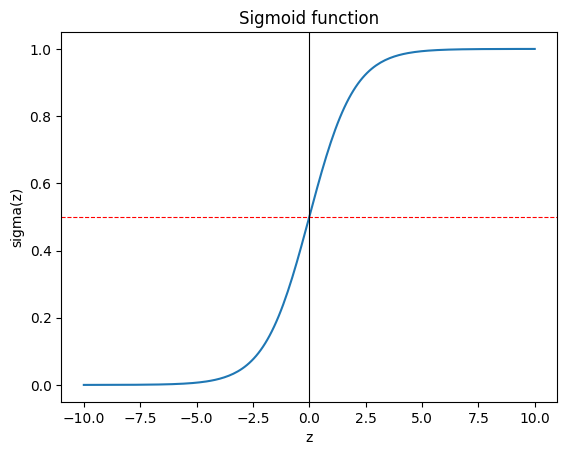

In [20]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

# Visualize the sigmoid function
z_values = np.linspace(-10, 10, 200)
sig_values = sigmoid(z_values)

plt.figure()
plt.plot(z_values, sig_values)
plt.title("Sigmoid function")
plt.xlabel("z")
plt.ylabel("sigma(z)")
plt.ylim(-0.05, 1.05)
plt.axhline(0.5, color="red", linestyle="--", linewidth=0.8)
plt.axvline(0, color="black", linewidth=0.8)
plt.show()

The plot shows $\sigma(z)$:

- For large negative $z$, $\sigma(z) \approx 0$.
- For large positive $z$, $\sigma(z) \approx 1$.
- At $z = 0$, $\sigma(0) = 0.5$.

This shape is ideal to model **probabilities**:

- If $z$ is very negative, $f_{\vec{w}, b}(\vec{x})$ is close to 0 (model is confident that $y = 0$).
- If $z$ is very positive, $f_{\vec{w}, b}(\vec{x})$ is close to 1 (model is confident that $y = 1$).
- Around $z = 0$, $f_{\vec{w}, b}(\vec{x}) \approx 0.5$ (model is uncertain).

Next, we connect this to **decision boundaries**.

### Cost Function for Logistic Regression
e want to choose $\vec{w}, b$ so that the model's predictions
$$
f_{\vec{w}, b}^{(i)}(\vec{x}^{(i)}) = f_{\vec{w}, b}(\vec{x}^{(i)})
$$
are close to the true labels $y^{(i)}$.

For **logistic regression**, we use the **logistic loss** per example:
$$
\ell^{(i)} =
\begin{cases}
-\log\left(f_{\vec{w}, b}^{(i)}(\vec{x}^{(i)})\right) & \text{if } y^{(i)} = 1, \\
-\log\left(1 - f_{\vec{w}, b}^{(i)}(\vec{x}^{(i)})\right) & \text{if } y^{(i)} = 0.
\end{cases}
$$

Intuition:

- If $y^{(i)} = 1$, we want $f_{\vec{w}, b}^{(i)}(\vec{x}^{(i)})$ close to 1.  
  Then $-\log(\cdot)$ is small.
- If $y^{(i)} = 0$, we want $f_{\vec{w}, b}^{(i)}(\vec{x}^{(i)})$ close to 0.  
  Then $-\log(1 - \cdot)$ is small.
- **Confident wrong predictions** produce a very large loss.

The overall cost function is the average loss over all $m$ examples:
$$
J(\vec{w}, b) =
-\frac{1}{m}
\sum_{i=1}^m
\left[
y^{(i)} \log f_{\vec{w}, b}^{(i)}(\vec{x}^{(i)})
+
(1 - y^{(i)}) \log\big(1 - f_{\vec{w}, b}^{(i)}(\vec{x}^{(i)})\big)
\right].
$$

In [21]:
def cost(X, y, w, b):
    m,n=X.shape
    # For each example i: f_{w,b}^{(i)}(x^{(i)}) = sigmoid(w^T x^{(i)} + b)
    z= X @ w + b
    # To avoid log(0), clip probabilities

    f=sigmoid(z)
    eps = 1e-8
    f_clipped = np.clip(f, eps, 1 - eps)

    J=(-1/m)*np.sum(y*np.log(f_clipped)+(1-y)*np.log(1-f_clipped))
    return J

# Quick test on linear dataset with zero parameters
w_test = np.zeros(x_train_norm.shape[1])  # 6 features
b_test = 0.0
J_test = cost(x_train_norm, y_train, w_test, b_test)
J_test



np.float64(0.6931471805599453)

### Gradients of the Cost Function

We want to minimize $J(\vec{w}, b)$ with respect to $\vec{w}$ and $b$.  
We use **gradient descent**, which requires the partial derivatives.

For each parameter $w_j$:
$$
\frac{\partial J}{\partial w_j}
=
\frac{1}{m}
\sum_{i=1}^m
\left(
f_{\vec{w}, b}^{(i)}(\vec{x}^{(i)}) - y^{(i)}
\right)
x^{(i)}_j,
$$
and for the bias:
$$
\frac{\partial J}{\partial b}
=
\frac{1}{m}
\sum_{i=1}^m
\left(
f_{\vec{w}, b}^{(i)}(\vec{x}^{(i)}) - y^{(i)}
\right).
$$

Vectorized view (conceptual):

1. Compute all $z^{(i)} = \vec{w} \cdot \vec{x}^{(i)} + b$ and
   $$
   f_{\vec{w}, b}^{(i)}(\vec{x}^{(i)}) = \sigma(z^{(i)}).
   $$
2. Define the error vector $\vec{e}$ with components
   $$
   e^{(i)} = f_{\vec{w}, b}^{(i)}(\vec{x}^{(i)}) - y^{(i)}.
   $$
3. Then
   $$
   \nabla_{\vec{w}} J = \frac{1}{m} X^\top \vec{e}, \quad
   \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m e^{(i)}.
   $$

We now implement this in code.


In [22]:
def gradient (X,y,w,b):
    m,n=X.shape
    z=X@w+b
    f=sigmoid(z)

    error=f-y

    dj_dw=(1/m)*(X.T @ error)
    dj_db=(1/m)*np.sum(error)

    return dj_dw,dj_db

# Quick test
dj_dw_test, dj_db_test = gradient(x_train_norm, y_train,w_test,b_test)
print(f"Gradient of w:\n{dj_dw_test.round(4)}")
print(f"Gradient of b: {dj_db_test:.4f}")

Gradient of w:
[-0.2577 -0.2133 -0.176  -0.1851 -0.1667 -0.0644]
Gradient of b: 0.0556


### Gradient Descent

To minimize $J(\vec{w}, b)$, we update the parameters in the opposite direction
of the gradient.

For each weight $w_j$:
$$
w_j := w_j - \alpha \frac{\partial J}{\partial w_j},
$$
and for the bias:
$$
b := b - \alpha \frac{\partial J}{\partial b},
$$

where $\alpha > 0$ is the **learning rate**.

Algorithm (high level):

1. Initialize $\vec{w}$ and $b$ (e.g., zeros).
2. Repeat for a number of iterations:
   - Compute $\frac{\partial J}{\partial w_j}$ and $\frac{\partial J}{\partial b}$.
   - Update $\vec{w}$ and $b$ with the rules above.
3. Track $J(\vec{w}, b)$ to see if it decreases.

We now implement gradient descent and train our model on the linear dataset.


In [23]:
def gradient_descent(X,y,w0,b0,alpha,num_iterations,print_every=0):
    b=b0
    w=w0.copy() 
    J_hist=[]

    for i in range(num_iterations):
        dj_dw,dj_db=gradient(X,y,w,b)
        w=w-alpha*dj_dw
        b=b-alpha*dj_db

        J=cost(X,y,w,b)
        J_hist.append(J)
        if print_every > 0 and (i % print_every == 0 or i == num_iterations - 1):
            print(f"Iteration {i:4d}: J(w, b) = {J:.4f}")

    return w, b, J_hist


# Train on the linear dataset
m_lin, n_lin = x_train_norm.shape
w0 = np.zeros(n_lin)
b0 = 0.0

alpha = 0.01
num_iters = 2000

w_trained, b_trained, J_hist = gradient_descent(
    x_train_norm, y_train, w0, b0, alpha, num_iters, print_every=50
)

w_trained, b_trained


Iteration    0: J(w, b) = 0.6910
Iteration   50: J(w, b) = 0.6073
Iteration  100: J(w, b) = 0.5544
Iteration  150: J(w, b) = 0.5199
Iteration  200: J(w, b) = 0.4963
Iteration  250: J(w, b) = 0.4798
Iteration  300: J(w, b) = 0.4678
Iteration  350: J(w, b) = 0.4588
Iteration  400: J(w, b) = 0.4520
Iteration  450: J(w, b) = 0.4468
Iteration  500: J(w, b) = 0.4426
Iteration  550: J(w, b) = 0.4393
Iteration  600: J(w, b) = 0.4367
Iteration  650: J(w, b) = 0.4345
Iteration  700: J(w, b) = 0.4327
Iteration  750: J(w, b) = 0.4312
Iteration  800: J(w, b) = 0.4300
Iteration  850: J(w, b) = 0.4289
Iteration  900: J(w, b) = 0.4281
Iteration  950: J(w, b) = 0.4273
Iteration 1000: J(w, b) = 0.4267
Iteration 1050: J(w, b) = 0.4261
Iteration 1100: J(w, b) = 0.4257
Iteration 1150: J(w, b) = 0.4253
Iteration 1200: J(w, b) = 0.4249
Iteration 1250: J(w, b) = 0.4246
Iteration 1300: J(w, b) = 0.4243
Iteration 1350: J(w, b) = 0.4241
Iteration 1400: J(w, b) = 0.4239
Iteration 1450: J(w, b) = 0.4237
Iteration 

(array([0.73560993, 0.83037702, 0.46543454, 0.47057824, 0.54415315,
        0.22055066]),
 np.float64(-0.25794487559915386))

In [24]:
# Verify convergence 
print(f"Initial Cost: {J_hist[0]:.4f}")
print(f"Final Coastl:   {J_hist[-1]:.4f}")
print(f"Reducction:     {(1 - J_hist[-1]/J_hist[0])*100:.1f}%")

Initial Cost: 0.6910
Final Coastl:   0.4227
Reducction:     38.8%


##  Plot cost vs. iterations.

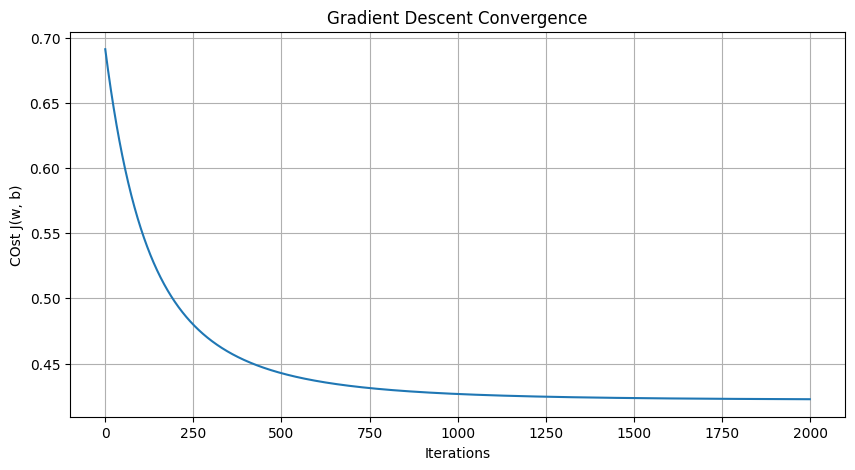

In [25]:

plt.figure(figsize=(10, 5))
plt.plot(J_hist)
plt.xlabel("Iterations")
plt.ylabel("COst J(w, b)")
plt.title("Gradient Descent Convergence")
plt.grid(True)
plt.show()


In [26]:
def predict(X, w, b, threshold=0.5):
    return (sigmoid(X @ w + b) >= threshold).astype(int)

y_pred_train = predict(x_train_norm, w_trained, b_trained)
y_pred_test = predict(x_test_norm, w_trained, b_trained)

train_acc = np.mean(y_pred_train == y_train) * 100
test_acc = np.mean(y_pred_test == y_test) * 100

print(f"\nAccuracy Train: {train_acc:.1f}%")
print(f"Accuracy Test:  {test_acc:.1f}%")


Accuracy Train: 82.5%
Accuracy Test:  88.9%


In [27]:

def confusion_matrix(y_true, y_pred):
    """Calculate confusion matrix components."""
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    return TP, TN, FP, FN

def calculate_metrics(y_true, y_pred):
    """Calculate accuracy, precision, recall, and F1-score."""
    TP, TN, FP, FN = confusion_matrix(y_true, y_pred)
    
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    
    return accuracy, precision, recall, f1, (TP, TN, FP, FN)

# Calculate metrics for TRAIN set
train_acc, train_prec, train_rec, train_f1, train_cm = calculate_metrics(y_train, y_pred_train)

# Calculate metrics for TEST set
test_acc, test_prec, test_rec, test_f1, test_cm = calculate_metrics(y_test, y_pred_test)

print("=" * 55)
print("MODEL EVALUATION METRICS")
print("=" * 55)
# Display results

metrics = [
    ("Accuracy",  train_acc,  test_acc),
    ("Precision", train_prec, test_prec),
    ("Recall",    train_rec,  test_rec),
    ("F1-Score",  train_f1,   test_f1),
]

print("\nMetric        Train     Test")
print("-----------------------------")
for name, tr, te in metrics:
    print(f"{name:<10}  {tr:.4f}  {te:.4f}")

def print_cm(cm, title):
    TP, TN, FP, FN = cm
    print(f"\n{title}")
    print(f"TN={TN}  FP={FP}")
    print(f"FN={FN}  TP={TP}")

print_cm(train_cm, "TRAIN SET:")
print_cm(test_cm,  "TEST SET:")


MODEL EVALUATION METRICS

Metric        Train     Test
-----------------------------
Accuracy    0.8254  0.8889
Precision   0.8228  0.9091
Recall      0.7738  0.8333
F1-Score    0.7975  0.8696

TRAIN SET:
TN=91  FP=14
FN=19  TP=65

TEST SET:
TN=42  FP=3
FN=6  TP=30


### Model Reporting & Interpretation

###  Convergence Analysis

The cost function plot shows the optimization behavior during training. Key observations:
- **Smooth decrease**: The cost decreases monotonically, indicating stable gradient descent
- **No oscillations**: The learning rate (α=0.01) is appropriate for this problem
- **Convergence**: The cost plateaus after ~1500 iterations, suggesting the model has converged

In [28]:



print("MODEL COEFFICIENTS INTERPRETATION")

# Display coefficients with feature names
print("\nTrained Weights (w) and Bias (b):")
print("-" * 60)
print(f"{'Feature':<25} {'Weight (w)':<12} {'Interpretation'}")
print("-" * 60)

for feat, weight in zip(features, w_trained):
    if weight > 0.3:
        interp = "Strong positive → increases risk"
    elif weight > 0:
        interp = "Weak positive → slight risk increase"
    elif weight > -0.3:
        interp = "Weak negative → slight risk decrease"
    else:
        interp = "Strong negative → decreases risk"
    print(f"{feat:<25} {weight:>+.4f}      {interp}")

print(f"\n{'Bias (b)':<25} {b_trained:>+.4f}")

# Odds ratios (exp(w) for normalized features)
print("\n" + "=" * 60)
print("FEATURE IMPORTANCE (by |weight| magnitude)")
print("=" * 60)
sorted_idx = np.argsort(np.abs(w_trained))[::-1]
print(f"\n{'Rank':<6} {'Feature':<25} {'|Weight|':<12}")
print("-" * 45)
for rank, idx in enumerate(sorted_idx, 1):
    print(f"{rank:<6} {features[idx]:<25} {np.abs(w_trained[idx]):.4f}")

MODEL COEFFICIENTS INTERPRETATION

Trained Weights (w) and Bias (b):
------------------------------------------------------------
Feature                   Weight (w)   Interpretation
------------------------------------------------------------
Thallium                  +0.7356      Strong positive → increases risk
Number of vessels fluro   +0.8304      Strong positive → increases risk
Chest pain type           +0.4654      Strong positive → increases risk
Exercise angina           +0.4706      Strong positive → increases risk
Sex                       +0.5442      Strong positive → increases risk
Age                       +0.2206      Weak positive → slight risk increase

Bias (b)                  -0.2579

FEATURE IMPORTANCE (by |weight| magnitude)

Rank   Feature                   |Weight|    
---------------------------------------------
1      Number of vessels fluro   0.8304
2      Thallium                  0.7356
3      Sex                       0.5442
4      Exercise angina     

## 3. Visualize Decision Boundaries

### Select ≥3 feature pairs 

In [29]:
def get_2_features(feat1,feat2):
    index_feat1=features.index(feat1)
    index_feat2=features.index(feat2)

    train_2d=x_train_norm[:,[index_feat1,index_feat2]]
    test_2d=x_test_norm[:,[index_feat1,index_feat2]]

    return train_2d,test_2d




### Feature Pairs Selection

We avoid binary features (Sex, Exercise angina) because they create only 2 horizontal/vertical lines in the plot, making visualization less informative.

**Selected pairs (avoiding binary features):**
1. **Thallium vs Number of vessels fluro** - Both highly correlated with target
2. **Thallium vs Age** - Best predictor + continuous variable
3. **Chest pain type vs Age** - Categorical (4 values) + continuous
4. **Number of vessels fluro vs Age** - Semi-continuous + continuous

In [30]:
# Par 1: Thallium vs Number of vessels fluro (both highly correlated with target)
thallium_vessels_train, thallium_vessels_test = get_2_features("Thallium", "Number of vessels fluro")
print(f"Par 1 shape: {thallium_vessels_train.shape}")

Par 1 shape: (189, 2)


### Par 2: Thallium vs Age

In [31]:
# Par 2: Thallium vs Age (best predictor + continuous)
thallium_age_train, thallium_age_test = get_2_features("Thallium", "Age")
print(f"Par 2 shape: {thallium_age_train.shape}")

Par 2 shape: (189, 2)


### Par 3: Chest pain type vs Age

In [32]:
# Par 3: Chest pain type vs Age (categorical 4 values + continuous)
chestpain_age_train, chestpain_age_test = get_2_features("Chest pain type", "Age")
print(f"Par 3 shape: {chestpain_age_train.shape}")

Par 3 shape: (189, 2)


### Par 4: Number of vessels fluro vs Age

In [33]:
# Par 4: Number of vessels fluro vs Age (semi-continuous + continuous)
vessels_age_train, vessels_age_test = get_2_features("Number of vessels fluro", "Age")
print(f"Par 4 shape: {vessels_age_train.shape}")

Par 4 shape: (189, 2)


## Training The Model

In [34]:
# Train model for Par 1: Thallium vs Vessels
w_2d = np.zeros(2)
b_2d = 0.0
w_thallium_vessels, b_thallium_vessels, J_hist_tv = gradient_descent(
    thallium_vessels_train, y_train, w_2d, b_2d, 0.1, 1000
)
print(f"Par 1 - Thallium vs Vessels:")
print(f"  Weights: {w_thallium_vessels.round(4)}")
print(f"  Bias: {b_thallium_vessels:.4f}")

Par 1 - Thallium vs Vessels:
  Weights: [1.0848 0.9489]
  Bias: -0.2372


In [35]:
# Train model for Par 2: Thallium vs Age
w_thallium_age, b_thallium_age, J_hist_ta = gradient_descent(
    thallium_age_train, y_train, np.zeros(2), 0.0, 0.1, 1000
)
print(f"Par 2 - Thallium vs Age:")
print(f"  Weights: {w_thallium_age.round(4)}")
print(f"  Bias: {b_thallium_age:.4f}")

Par 2 - Thallium vs Age:
  Weights: [1.1804 0.3477]
  Bias: -0.2936


In [36]:
# Train model for Par 3: Chest pain vs Age
w_chestpain_age, b_chestpain_age, J_hist_ca = gradient_descent(
    chestpain_age_train, y_train, np.zeros(2), 0.0, 0.1, 1000
)
print(f"Par 3 - Chest pain vs Age:")
print(f"  Weights: {w_chestpain_age.round(4)}")
print(f"  Bias: {b_chestpain_age:.4f}")

Par 3 - Chest pain vs Age:
  Weights: [0.8299 0.2442]
  Bias: -0.2949


In [37]:
# Train model for Par 4: Vessels vs Age
w_vessels_age, b_vessels_age, J_hist_va = gradient_descent(
    vessels_age_train, y_train, np.zeros(2), 0.0, 0.1, 1000
)
print(f"Par 4 - Vessels vs Age:")
print(f"  Weights: {w_vessels_age.round(4)}")
print(f"  Bias: {b_vessels_age:.4f}")

Par 4 - Vessels vs Age:
  Weights: [ 1.0253 -0.0141]
  Bias: -0.1915


In [38]:
def plot_decision_boundary(X, y, w, b, feat1_name, feat2_name):
    """
    Grafica scatter plot con decision boundary y regiones coloreadas.
    """
    plt.figure(figsize=(10, 7))
    
    # Definir límites con margen
    x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    # Crear mesh grid para colorear regiones
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 200),
                           np.linspace(x2_min, x2_max, 200))
    
    # Calcular predicciones para cada punto del grid
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    Z = sigmoid(grid @ w + b)
    Z = Z.reshape(xx1.shape)
    
    # Colorear regiones de decisión
    plt.contourf(xx1, xx2, Z, levels=[0, 0.5, 1], 
                 colors=['lightgreen', 'lightsalmon'], alpha=0.3)
    
    # Dibujar línea de decisión (contorno en 0.5)
    plt.contour(xx1, xx2, Z, levels=[0.5], colors='blue', linewidths=2)
    
    # Scatter plot de clase 0 (sin enfermedad)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], 
                c='green', edgecolor='black', label='No Disease (0)', 
                alpha=0.7, s=60, marker='o')
    
    # Scatter plot de clase 1 (con enfermedad)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], 
                c='red', edgecolor='black', label='Disease (1)', 
                alpha=0.7, s=60, marker='x')
    
    # Configuración
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.xlabel(f"{feat1_name} (normalized)")
    plt.ylabel(f"{feat2_name} (normalized)")
    plt.title(f"Decision Boundary: {feat1_name} vs {feat2_name}")
    plt.legend(loc='best')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_4766/3560870797.py:33: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[y == 1, 0], X[y == 1, 1],


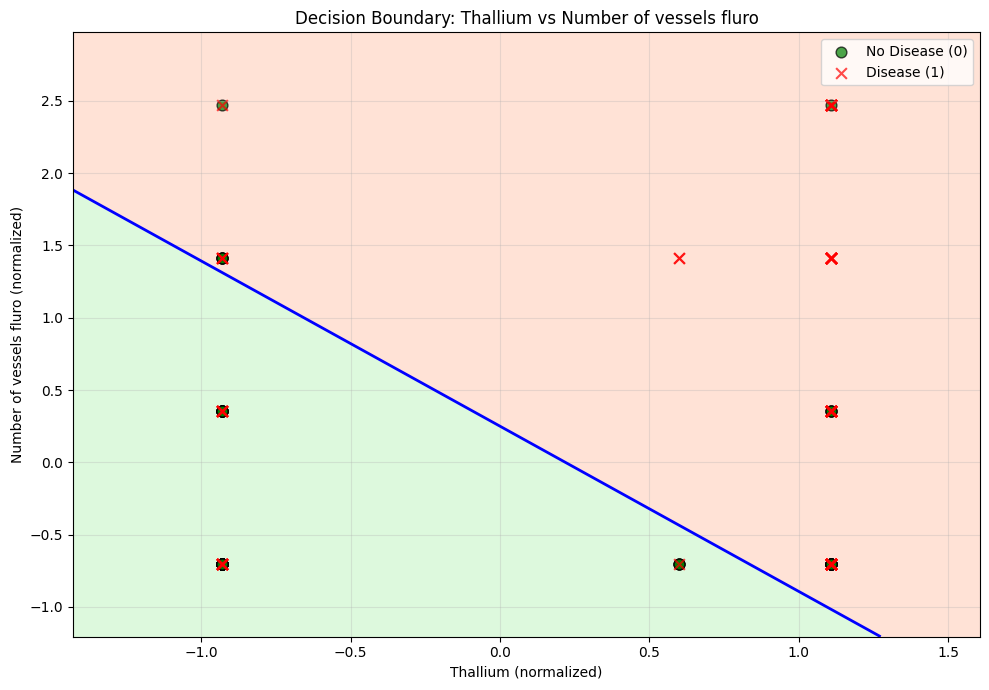

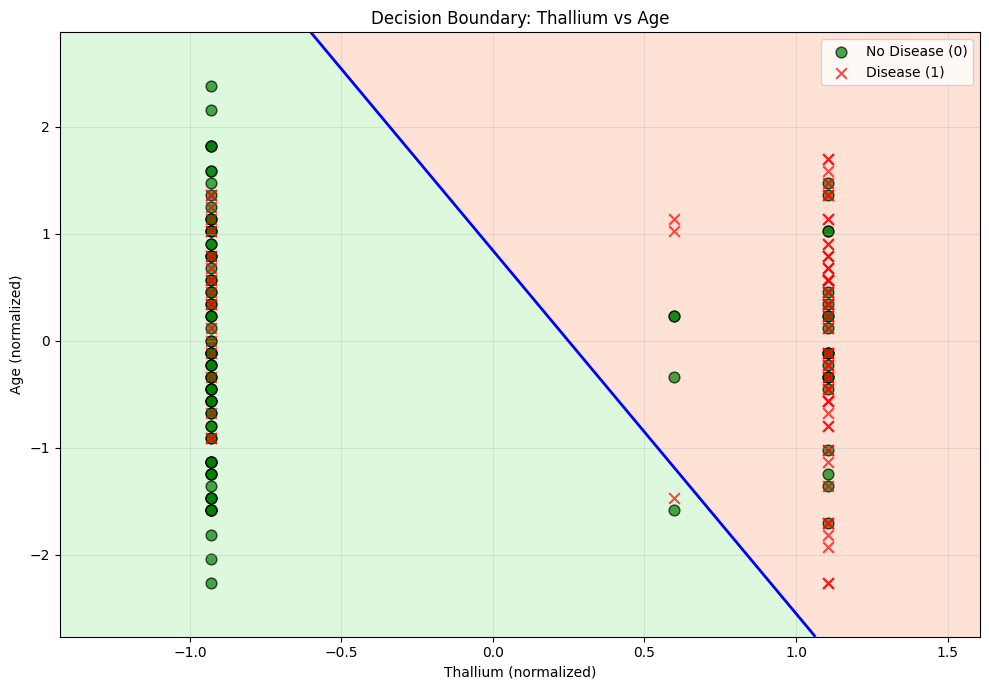

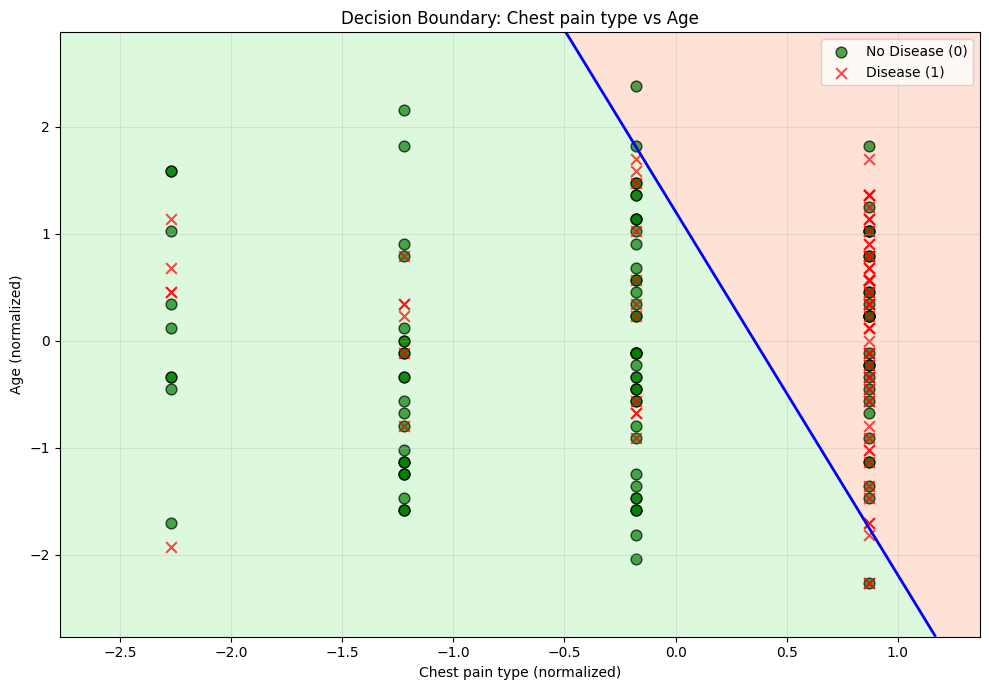

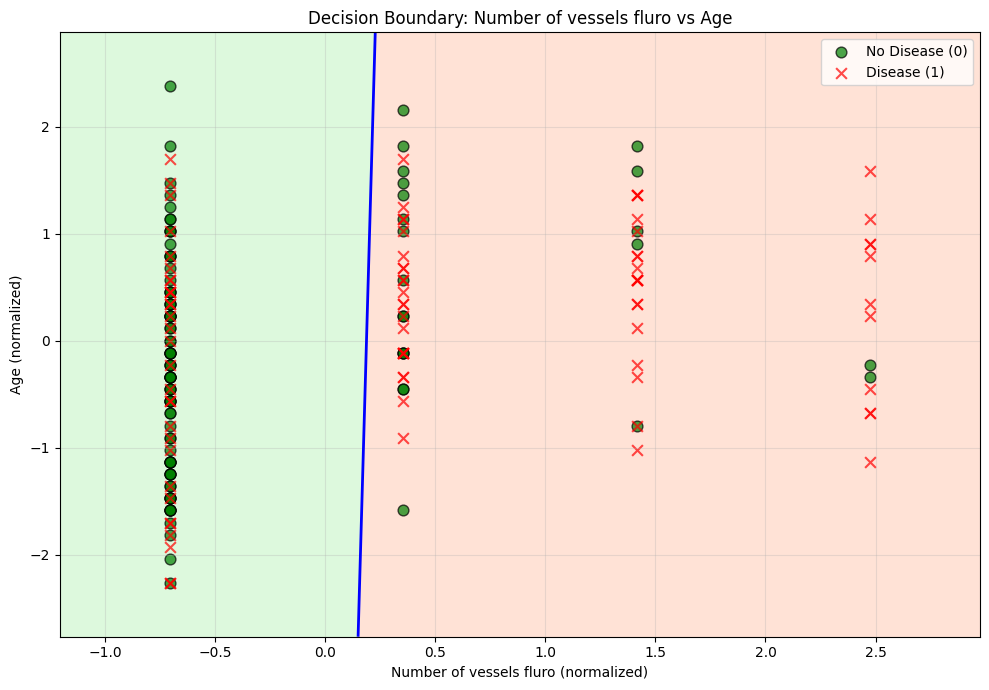

In [39]:
# Plot all 4 decision boundaries
# Par 1: Thallium vs Vessels
plot_decision_boundary(thallium_vessels_train, y_train, w_thallium_vessels, b_thallium_vessels, 
                       "Thallium", "Number of vessels fluro")

# Par 2: Thallium vs Age
plot_decision_boundary(thallium_age_train, y_train, w_thallium_age, b_thallium_age, 
                       "Thallium", "Age")

# Par 3: Chest pain vs Age
plot_decision_boundary(chestpain_age_train, y_train, w_chestpain_age, b_chestpain_age, 
                       "Chest pain type", "Age")

# Par 4: Vessels vs Age
plot_decision_boundary(vessels_age_train, y_train, w_vessels_age, b_vessels_age, 
                       "Number of vessels fluro", "Age")

In [40]:
# Accuracy comparison for all 2D models
print("=" * 55)
print("2D MODELS ACCURACY COMPARISON")
print("=" * 55)

models_2d = [
    ("Thallium vs Vessels", thallium_vessels_train, w_thallium_vessels, b_thallium_vessels),
    ("Thallium vs Age", thallium_age_train, w_thallium_age, b_thallium_age),
    ("Chest pain vs Age", chestpain_age_train, w_chestpain_age, b_chestpain_age),
    ("Vessels vs Age", vessels_age_train, w_vessels_age, b_vessels_age),
]

print(f"\n{'Model':<25} {'Train Acc':>12}")
print("-" * 40)
for name, X_2d, w, b in models_2d:
    y_pred = predict(X_2d, w, b)
    acc = np.mean(y_pred == y_train) * 100
    print(f"{name:<25} {acc:>10.1f}%")

print(f"\n{'Full model (6 features)':<25} {train_acc:>10.1f}%")

2D MODELS ACCURACY COMPARISON

Model                        Train Acc
----------------------------------------
Thallium vs Vessels             76.7%
Thallium vs Age                 75.7%
Chest pain vs Age               70.9%
Vessels vs Age                  71.4%

Full model (6 features)          0.8%


## 4. Repeat with Regularization

### Regularized Logistic Regression

We now implement **regularized logistic regression**.

Recall the (unregularized) hypothesis:
$$
f_{\vec{w}, b}^{(i)}(\vec{x}^{(i)}) = \sigma(\vec{w} \cdot \vec{x}^{(i)} + b).
$$

Regularized cost:
$$
J_{\text{reg}}(\vec{w}, b) =
-\frac{1}{m}
\sum_{i=1}^m
\left[
y^{(i)} \log f_{\vec{w}, b}^{(i)}(\vec{x}^{(i)}) \;+\;
(1 - y^{(i)}) \log\big(1 - f_{\vec{w}, b}^{(i)}(\vec{x}^{(i)})\big)
\right]
+
\frac{\lambda}{2m}\sum_{j=1}^n w_j^2.
$$


### Gradients for Regularized Logistic Regression

For each example:
$$
f_{\vec{w}, b}^{(i)}(\vec{x}^{(i)}) = \sigma(\vec{w}\cdot\vec{x}^{(i)} + b).
$$

Define the error:
$$
e^{(i)} = f_{\vec{w}, b}^{(i)}(\vec{x}^{(i)}) - y^{(i)}.
$$

Then the gradients of the regularized cost are:

For each weight $w_j$:
$$
\frac{\partial J_{\text{reg}}}{\partial w_j}
=
\frac{1}{m}\sum_{i=1}^m e^{(i)} x^{(i)}_j
+
\frac{\lambda}{m} w_j,
$$

and for the bias:
$$
\frac{\partial J_{\text{reg}}}{\partial b}
=
\frac{1}{m}\sum_{i=1}^m e^{(i)}.
$$

Gradient descent updates are:

$$
w_j := w_j - \alpha \frac{\partial J_{\text{reg}}}{\partial w_j},
\quad
b := b - \alpha \frac{\partial J_{\text{reg}}}{\partial b}.
$$


In [41]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def cost_log_reg_reg(X, y, w, b, lam):
    """Regularized logistic regression cost."""
    m, n = X.shape
    z = X @ w + b
    f = sigmoid(z)  # f_{w,b}^{(i)}(x^{(i)})
    eps = 1e-8
    f_clipped = np.clip(f, eps, 1 - eps)
    # Cross-entropy term
    ce = - (1 / m) * np.sum(
        y * np.log(f_clipped) + (1 - y) * np.log(1 - f_clipped)
    )
    # Regularization term
    reg = (lam / (2 * m)) * np.sum(w ** 2)
    return ce + reg


def gradient_log_reg_reg(X, y, w, b, lam):
    """Gradient of regularized logistic regression cost."""
    m, n = X.shape
    z = X @ w + b
    f = sigmoid(z)
    error = f - y  # f_{w,b}^{(i)}(x^{(i)}) - y^{(i)}
    dj_dw = (1 / m) * (X.T @ error) + (lam / m) * w
    dj_db = (1 / m) * np.sum(error)
    return dj_dw, dj_db


def gradient_descent_log_reg_reg(X, y, w_init, b_init, alpha, lam, num_iters):
    w = w_init.copy()
    b = b_init
    J_history = []
    for i in range(num_iters):
        dj_dw, dj_db = gradient_log_reg_reg(X, y, w, b, lam)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        J_history.append(cost_log_reg_reg(X, y, w, b, lam))
    return w, b, J_history

### Hyperparameter Tuning: Selecting Optimal λ

We evaluate different regularization strengths to find the best balance between:
- **Underfitting** (λ too large → model too simple)
- **Overfitting** (λ too small → model memorizes training data)

We test λ ∈ {0, 0.001, 0.01, 0.1, 1} and compare:
- Training and test accuracy
- Weight magnitude ||w||₂ (L2 norm)

In [42]:
# Define lambda values to test
lambda_values = [0, 0.001, 0.01, 0.1, 1]

# Store results for each lambda
results_full = []

print("=" * 70)
print("REGULARIZATION HYPERPARAMETER TUNING (FULL MODEL - 6 FEATURES)")
print("=" * 70)

for lam in lambda_values:
    # Initialize parameters
    w_init = np.zeros(x_train_norm.shape[1])
    b_init = 0.0
    
    # Train with regularization
    w_reg, b_reg, J_hist_reg = gradient_descent_log_reg_reg(
        x_train_norm, y_train, w_init, b_init,
        alpha=0.1, lam=lam, num_iters=2000
    )
    
    # Predictions
    y_pred_train_reg = predict(x_train_norm, w_reg, b_reg)
    y_pred_test_reg = predict(x_test_norm, w_reg, b_reg)
    
    # Metrics
    train_acc_reg = np.mean(y_pred_train_reg == y_train) * 100
    test_acc_reg = np.mean(y_pred_test_reg == y_test) * 100
    w_norm = np.linalg.norm(w_reg)
    
    results_full.append({
        'lambda': lam,
        'w': w_reg,
        'b': b_reg,
        'J_hist': J_hist_reg,
        'train_acc': train_acc_reg,
        'test_acc': test_acc_reg,
        'w_norm': w_norm
    })
    
    print(f"\nλ = {lam}")
    print(f"  Train Accuracy: {train_acc_reg:.2f}%")
    print(f"  Test Accuracy:  {test_acc_reg:.2f}%")
    print(f"  ||w||₂ (L2 norm): {w_norm:.4f}")

REGULARIZATION HYPERPARAMETER TUNING (FULL MODEL - 6 FEATURES)

λ = 0
  Train Accuracy: 81.48%
  Test Accuracy:  88.89%
  ||w||₂ (L2 norm): 1.4989

λ = 0.001
  Train Accuracy: 81.48%
  Test Accuracy:  88.89%
  ||w||₂ (L2 norm): 1.4988

λ = 0.01
  Train Accuracy: 81.48%
  Test Accuracy:  88.89%
  ||w||₂ (L2 norm): 1.4982

λ = 0.1
  Train Accuracy: 81.48%
  Test Accuracy:  88.89%
  ||w||₂ (L2 norm): 1.4920

λ = 1
  Train Accuracy: 82.01%
  Test Accuracy:  88.89%
  ||w||₂ (L2 norm): 1.4355


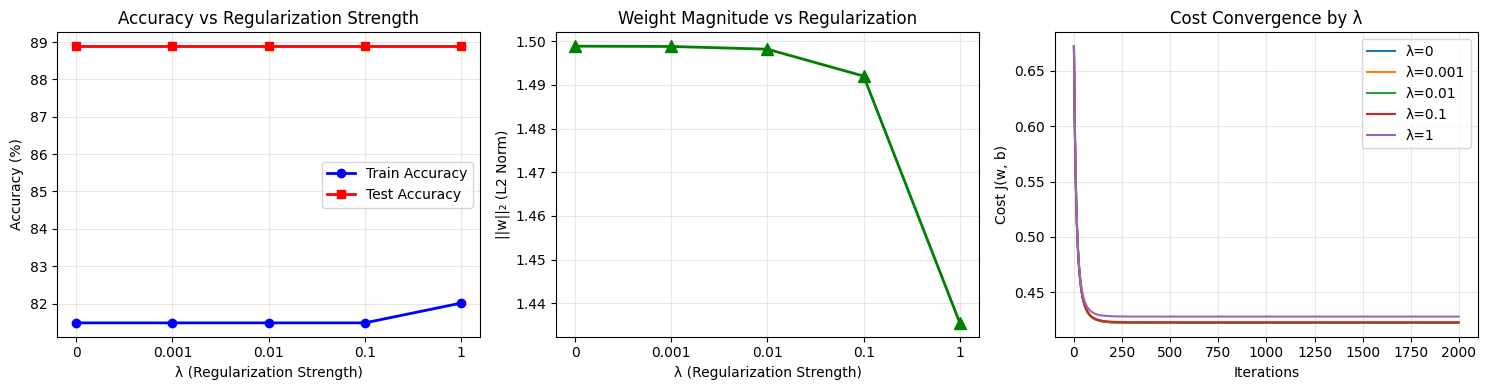

In [43]:
# Visualize hyperparameter tuning results
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

lambdas = [r['lambda'] for r in results_full]
train_accs = [r['train_acc'] for r in results_full]
test_accs = [r['test_acc'] for r in results_full]
w_norms = [r['w_norm'] for r in results_full]

# Plot 1: Accuracy vs Lambda
axes[0].plot(range(len(lambdas)), train_accs, 'b-o', label='Train Accuracy', linewidth=2)
axes[0].plot(range(len(lambdas)), test_accs, 'r-s', label='Test Accuracy', linewidth=2)
axes[0].set_xticks(range(len(lambdas)))
axes[0].set_xticklabels([str(l) for l in lambdas])
axes[0].set_xlabel('λ (Regularization Strength)')
axes[0].set_ylabel('Accuracy (%)')
axes[0].set_title('Accuracy vs Regularization Strength')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Weight Norm vs Lambda
axes[1].plot(range(len(lambdas)), w_norms, 'g-^', linewidth=2, markersize=8)
axes[1].set_xticks(range(len(lambdas)))
axes[1].set_xticklabels([str(l) for l in lambdas])
axes[1].set_xlabel('λ (Regularization Strength)')
axes[1].set_ylabel('||w||₂ (L2 Norm)')
axes[1].set_title('Weight Magnitude vs Regularization')
axes[1].grid(True, alpha=0.3)

# Plot 3: Cost Convergence for different lambdas
for r in results_full:
    axes[2].plot(r['J_hist'], label=f"λ={r['lambda']}")
axes[2].set_xlabel('Iterations')
axes[2].set_ylabel('Cost J(w, b)')
axes[2].set_title('Cost Convergence by λ')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [44]:
# Summary table for lambda tuning
print("=" * 75)
print("LAMBDA TUNING SUMMARY TABLE")
print("=" * 75)
print(f"\n{'λ':<10} {'Train Acc':<12} {'Test Acc':<12} {'||w||₂':<12} {'Gap (Train-Test)':<15}")
print("-" * 65)

for r in results_full:
    gap = r['train_acc'] - r['test_acc']
    print(f"{r['lambda']:<10} {r['train_acc']:<12.2f} {r['test_acc']:<12.2f} {r['w_norm']:<12.4f} {gap:<15.2f}")

# Find best lambda based on test accuracy
best_result = max(results_full, key=lambda x: x['test_acc'])
print(f"\n✓ Best λ = {best_result['lambda']} (Test Accuracy: {best_result['test_acc']:.2f}%)")

LAMBDA TUNING SUMMARY TABLE

λ          Train Acc    Test Acc     ||w||₂       Gap (Train-Test)
-----------------------------------------------------------------
0          81.48        88.89        1.4989       -7.41          
0.001      81.48        88.89        1.4988       -7.41          
0.01       81.48        88.89        1.4982       -7.41          
0.1        81.48        88.89        1.4920       -7.41          
1          82.01        88.89        1.4355       -6.88          

✓ Best λ = 0 (Test Accuracy: 88.89%)


### Retrain Feature Pairs with Regularization

Now we retrain the 2D models (feature pairs) using different λ values to analyze the effect of regularization on simpler models.

In [45]:
# Define feature pairs for 2D analysis
feature_pairs = [
    ("Thallium", "Number of vessels fluro", thallium_vessels_train, thallium_vessels_test),
    ("Thallium", "Age", thallium_age_train, thallium_age_test),
    ("Chest pain type", "Age", chestpain_age_train, chestpain_age_test),
    ("Number of vessels fluro", "Age", vessels_age_train, vessels_age_test),
]

# Store results for all pairs and lambdas
results_2d = {}

print("=" * 75)
print("REGULARIZATION TUNING FOR 2D FEATURE PAIRS")
print("=" * 75)

for feat1, feat2, X_train_2d, X_test_2d in feature_pairs:
    pair_name = f"{feat1} vs {feat2}"
    results_2d[pair_name] = []
    
    print(f"\n{pair_name}")
    print("-" * 50)
    
    for lam in lambda_values:
        # Train regularized model
        w_2d_reg, b_2d_reg, J_hist_2d = gradient_descent_log_reg_reg(
            X_train_2d, y_train, np.zeros(2), 0.0,
            alpha=0.1, lam=lam, num_iters=1000
        )
        
        # Calculate metrics
        y_pred_2d = predict(X_train_2d, w_2d_reg, b_2d_reg)
        acc_2d = np.mean(y_pred_2d == y_train) * 100
        w_norm_2d = np.linalg.norm(w_2d_reg)
        
        results_2d[pair_name].append({
            'lambda': lam,
            'w': w_2d_reg,
            'b': b_2d_reg,
            'J_hist': J_hist_2d,
            'train_acc': acc_2d,
            'w_norm': w_norm_2d
        })
        
        print(f"  λ={lam:<6} | Acc: {acc_2d:>6.2f}% | ||w||₂: {w_norm_2d:.4f}")

REGULARIZATION TUNING FOR 2D FEATURE PAIRS

Thallium vs Number of vessels fluro
--------------------------------------------------
  λ=0      | Acc:  76.72% | ||w||₂: 1.4413
  λ=0.001  | Acc:  76.72% | ||w||₂: 1.4412
  λ=0.01   | Acc:  76.72% | ||w||₂: 1.4407
  λ=0.1    | Acc:  76.72% | ||w||₂: 1.4349
  λ=1      | Acc:  76.72% | ||w||₂: 1.3818

Thallium vs Age
--------------------------------------------------
  λ=0      | Acc:  75.66% | ||w||₂: 1.2306
  λ=0.001  | Acc:  75.66% | ||w||₂: 1.2305
  λ=0.01   | Acc:  75.66% | ||w||₂: 1.2302
  λ=0.1    | Acc:  75.66% | ||w||₂: 1.2265
  λ=1      | Acc:  75.66% | ||w||₂: 1.1912

Chest pain type vs Age
--------------------------------------------------
  λ=0      | Acc:  70.90% | ||w||₂: 0.8650
  λ=0.001  | Acc:  70.90% | ||w||₂: 0.8650
  λ=0.01   | Acc:  70.90% | ||w||₂: 0.8648
  λ=0.1    | Acc:  70.90% | ||w||₂: 0.8622
  λ=1      | Acc:  70.90% | ||w||₂: 0.8376

Number of vessels fluro vs Age
-------------------------------------------------

### Comparing Unregularized vs Regularized: Decision Boundaries

We select one feature pair (**Thallium vs Number of vessels fluro**) to visualize how regularization affects the decision boundary. We compare:
- **λ = 0** (no regularization)
- **λ = 0.1** (moderate regularization)
- **λ = 1** (strong regularization)

/tmp/ipykernel_4766/3238642683.py:36: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X[y == 1, 0], X[y == 1, 1], c='red', edgecolor='black',


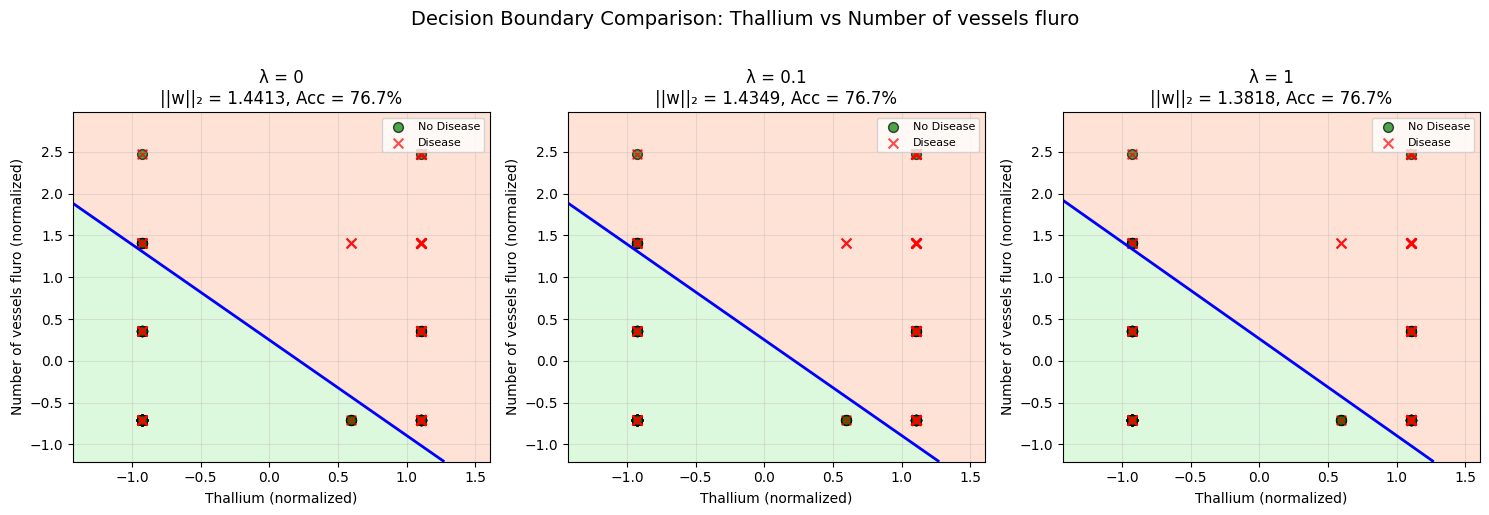

In [46]:
def plot_decision_boundary_comparison(X, y, results_dict, feat1_name, feat2_name, lambdas_to_plot):
    """
    Plot decision boundaries for multiple lambda values side by side.
    """
    n_plots = len(lambdas_to_plot)
    fig, axes = plt.subplots(1, n_plots, figsize=(5 * n_plots, 5))
    
    if n_plots == 1:
        axes = [axes]
    
    # Define limits
    x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    # Create mesh grid
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 200),
                           np.linspace(x2_min, x2_max, 200))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    
    for ax, lam in zip(axes, lambdas_to_plot):
        # Find result for this lambda
        result = next(r for r in results_dict if r['lambda'] == lam)
        w, b = result['w'], result['b']
        
        # Calculate predictions for grid
        Z = sigmoid(grid @ w + b).reshape(xx1.shape)
        
        # Plot decision regions
        ax.contourf(xx1, xx2, Z, levels=[0, 0.5, 1], 
                    colors=['lightgreen', 'lightsalmon'], alpha=0.3)
        ax.contour(xx1, xx2, Z, levels=[0.5], colors='blue', linewidths=2)
        
        # Scatter plot
        ax.scatter(X[y == 0, 0], X[y == 0, 1], c='green', edgecolor='black', 
                   label='No Disease', alpha=0.7, s=50, marker='o')
        ax.scatter(X[y == 1, 0], X[y == 1, 1], c='red', edgecolor='black', 
                   label='Disease', alpha=0.7, s=50, marker='x')
        
        ax.set_xlim(x1_min, x1_max)
        ax.set_ylim(x2_min, x2_max)
        ax.set_xlabel(f"{feat1_name} (normalized)")
        ax.set_ylabel(f"{feat2_name} (normalized)")
        ax.set_title(f"λ = {lam}\n||w||₂ = {result['w_norm']:.4f}, Acc = {result['train_acc']:.1f}%")
        ax.grid(True, alpha=0.3)
        ax.legend(loc='upper right', fontsize=8)
    
    plt.suptitle(f"Decision Boundary Comparison: {feat1_name} vs {feat2_name}", 
                 fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()

# Plot comparison for Thallium vs Vessels
pair_key = "Thallium vs Number of vessels fluro"
plot_decision_boundary_comparison(
    thallium_vessels_train, y_train,
    results_2d[pair_key],
    "Thallium", "Number of vessels fluro",
    lambdas_to_plot=[0, 0.1, 1]
)

### Cost Convergence Comparison: Unregularized vs Regularized

Comparing the cost function evolution during training for different regularization strengths.

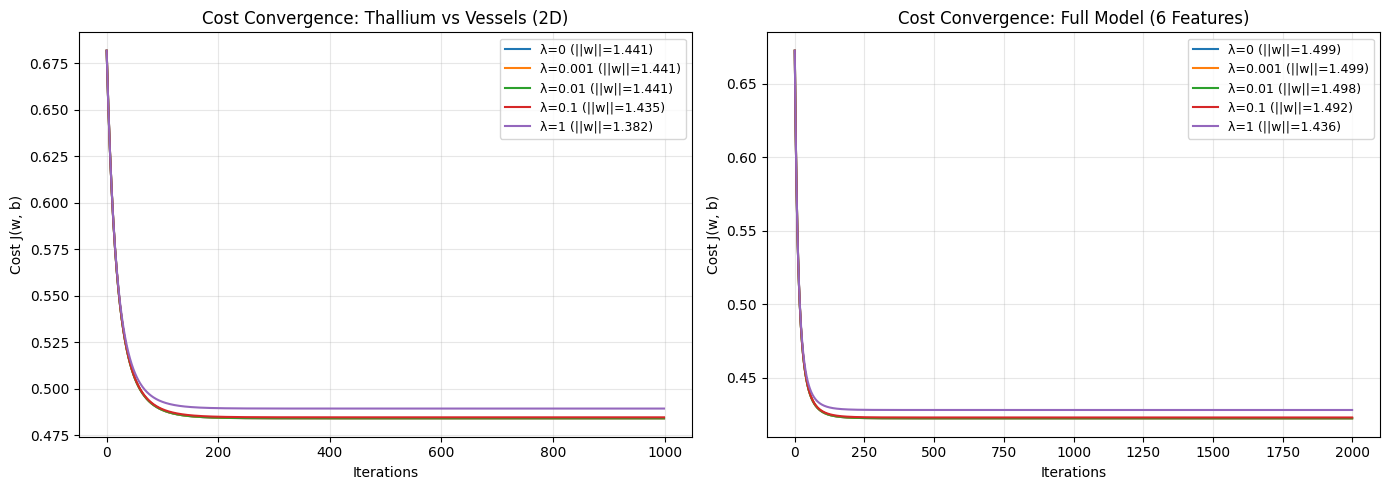

In [47]:
# Compare cost convergence for Thallium vs Vessels pair
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: 2D model (Thallium vs Vessels)
pair_key = "Thallium vs Number of vessels fluro"
for r in results_2d[pair_key]:
    label = f"λ={r['lambda']} (||w||={r['w_norm']:.3f})"
    axes[0].plot(r['J_hist'], label=label, linewidth=1.5)

axes[0].set_xlabel('Iterations')
axes[0].set_ylabel('Cost J(w, b)')
axes[0].set_title('Cost Convergence: Thallium vs Vessels (2D)')
axes[0].legend(fontsize=9)
axes[0].grid(True, alpha=0.3)

# Right: Full model (6 features)
for r in results_full:
    label = f"λ={r['lambda']} (||w||={r['w_norm']:.3f})"
    axes[1].plot(r['J_hist'], label=label, linewidth=1.5)

axes[1].set_xlabel('Iterations')
axes[1].set_ylabel('Cost J(w, b)')
axes[1].set_title('Cost Convergence: Full Model (6 Features)')
axes[1].legend(fontsize=9)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Detailed Metrics Evaluation: Regularized vs Unregularized

Comprehensive comparison including precision, recall, F1-score, and confusion matrices for the best regularized model.

In [48]:
# Get unregularized model (λ=0) and best regularized model
unreg_model = next(r for r in results_full if r['lambda'] == 0)
best_reg_model = best_result  # Already found earlier

# Predictions for both models
y_pred_train_unreg = predict(x_train_norm, unreg_model['w'], unreg_model['b'])
y_pred_test_unreg = predict(x_test_norm, unreg_model['w'], unreg_model['b'])

y_pred_train_best = predict(x_train_norm, best_reg_model['w'], best_reg_model['b'])
y_pred_test_best = predict(x_test_norm, best_reg_model['w'], best_reg_model['b'])

# Calculate all metrics
unreg_train_metrics = calculate_metrics(y_train, y_pred_train_unreg)
unreg_test_metrics = calculate_metrics(y_test, y_pred_test_unreg)
best_train_metrics = calculate_metrics(y_train, y_pred_train_best)
best_test_metrics = calculate_metrics(y_test, y_pred_test_best)

print("=" * 80)
print("COMPREHENSIVE METRICS COMPARISON: UNREGULARIZED vs BEST REGULARIZED")
print("=" * 80)

print(f"\n{'UNREGULARIZED (λ = 0)'}")
print("-" * 60)
print(f"{'Metric':<15} {'Train':<12} {'Test':<12}")
print("-" * 40)
print(f"{'Accuracy':<15} {unreg_train_metrics[0]*100:<12.2f} {unreg_test_metrics[0]*100:<12.2f}")
print(f"{'Precision':<15} {unreg_train_metrics[1]*100:<12.2f} {unreg_test_metrics[1]*100:<12.2f}")
print(f"{'Recall':<15} {unreg_train_metrics[2]*100:<12.2f} {unreg_test_metrics[2]*100:<12.2f}")
print(f"{'F1-Score':<15} {unreg_train_metrics[3]*100:<12.2f} {unreg_test_metrics[3]*100:<12.2f}")
print(f"{'||w||₂':<15} {unreg_model['w_norm']:<12.4f}")

print(f"\n{'REGULARIZED (λ = ' + str(best_reg_model['lambda']) + ')'}")
print("-" * 60)
print(f"{'Metric':<15} {'Train':<12} {'Test':<12}")
print("-" * 40)
print(f"{'Accuracy':<15} {best_train_metrics[0]*100:<12.2f} {best_test_metrics[0]*100:<12.2f}")
print(f"{'Precision':<15} {best_train_metrics[1]*100:<12.2f} {best_test_metrics[1]*100:<12.2f}")
print(f"{'Recall':<15} {best_train_metrics[2]*100:<12.2f} {best_test_metrics[2]*100:<12.2f}")
print(f"{'F1-Score':<15} {best_train_metrics[3]*100:<12.2f} {best_test_metrics[3]*100:<12.2f}")
print(f"{'||w||₂':<15} {best_reg_model['w_norm']:<12.4f}")

COMPREHENSIVE METRICS COMPARISON: UNREGULARIZED vs BEST REGULARIZED

UNREGULARIZED (λ = 0)
------------------------------------------------------------
Metric          Train        Test        
----------------------------------------
Accuracy        81.48        88.89       
Precision       81.82        90.91       
Recall          75.00        83.33       
F1-Score        78.26        86.96       
||w||₂          1.4989      

REGULARIZED (λ = 0)
------------------------------------------------------------
Metric          Train        Test        
----------------------------------------
Accuracy        81.48        88.89       
Precision       81.82        90.91       
Recall          75.00        83.33       
F1-Score        78.26        86.96       
||w||₂          1.4989      


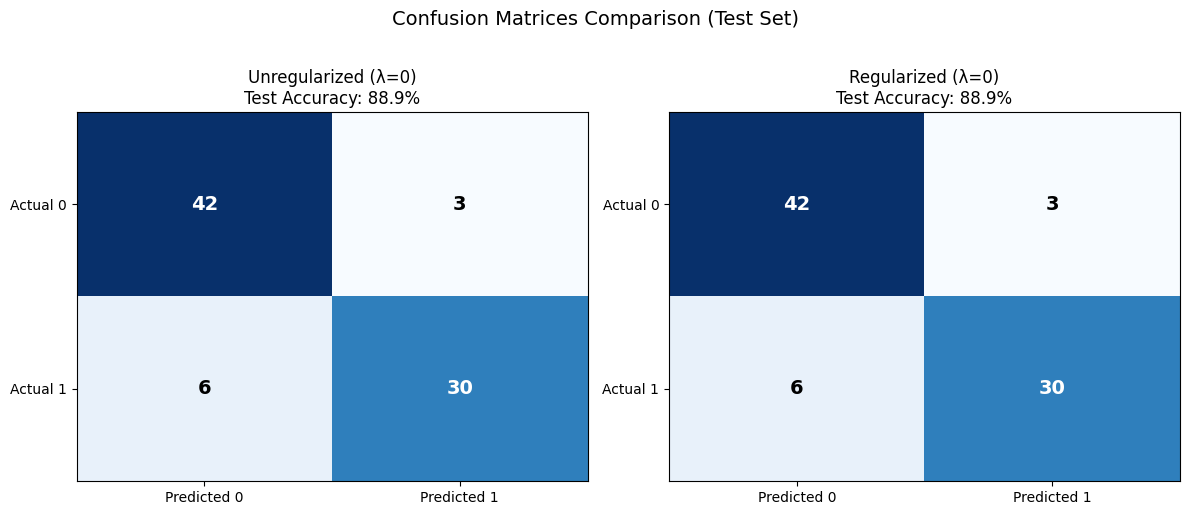

In [49]:
# Plot confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Helper function to plot confusion matrix
def plot_cm_heatmap(ax, cm_tuple, title):
    TP, TN, FP, FN = cm_tuple
    cm_matrix = np.array([[TN, FP], [FN, TP]])
    
    im = ax.imshow(cm_matrix, cmap='Blues', aspect='auto')
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['Predicted 0', 'Predicted 1'])
    ax.set_yticklabels(['Actual 0', 'Actual 1'])
    ax.set_title(title)
    
    # Add text annotations
    for i in range(2):
        for j in range(2):
            text = ax.text(j, i, f'{cm_matrix[i, j]}', 
                          ha='center', va='center', fontsize=14, fontweight='bold',
                          color='white' if cm_matrix[i, j] > cm_matrix.max()/2 else 'black')
    
    return im

# Unregularized confusion matrix (test set)
plot_cm_heatmap(axes[0], unreg_test_metrics[4], f'Unregularized (λ=0)\nTest Accuracy: {unreg_test_metrics[0]*100:.1f}%')

# Best regularized confusion matrix (test set)
plot_cm_heatmap(axes[1], best_test_metrics[4], f'Regularized (λ={best_reg_model["lambda"]})\nTest Accuracy: {best_test_metrics[0]*100:.1f}%')

plt.suptitle('Confusion Matrices Comparison (Test Set)', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

### Weight Magnitude Analysis: Effect of Regularization

L2 regularization penalizes large weights, pushing them toward smaller values. We compare the weight vectors for different λ values.

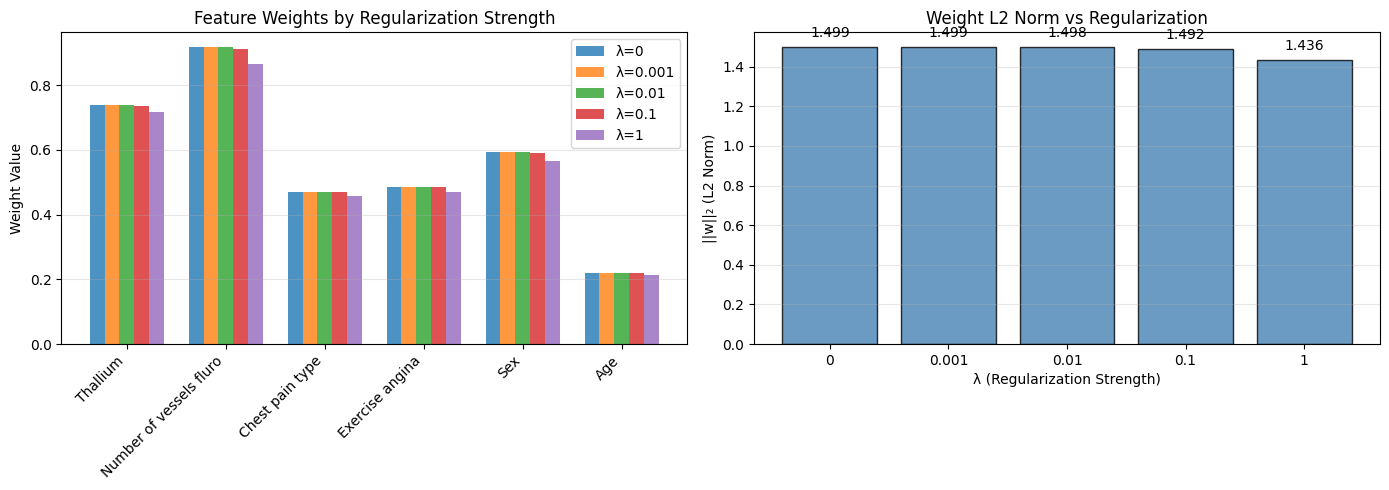

In [50]:
# Compare weight magnitudes across different lambda values
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: Bar chart of weights for each lambda
x_pos = np.arange(len(features))
width = 0.15
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for idx, r in enumerate(results_full):
    offset = (idx - len(results_full)/2 + 0.5) * width
    bars = axes[0].bar(x_pos + offset, r['w'], width, 
                       label=f"λ={r['lambda']}", color=colors[idx], alpha=0.8)

axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(features, rotation=45, ha='right')
axes[0].set_ylabel('Weight Value')
axes[0].set_title('Feature Weights by Regularization Strength')
axes[0].legend(loc='upper right')
axes[0].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
axes[0].grid(True, alpha=0.3, axis='y')

# Right: L2 norm vs lambda with log scale
lambdas_plot = [r['lambda'] for r in results_full]
norms_plot = [r['w_norm'] for r in results_full]

axes[1].bar(range(len(lambdas_plot)), norms_plot, color='steelblue', edgecolor='black', alpha=0.8)
axes[1].set_xticks(range(len(lambdas_plot)))
axes[1].set_xticklabels([str(l) for l in lambdas_plot])
axes[1].set_xlabel('λ (Regularization Strength)')
axes[1].set_ylabel('||w||₂ (L2 Norm)')
axes[1].set_title('Weight L2 Norm vs Regularization')
axes[1].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (lam, norm) in enumerate(zip(lambdas_plot, norms_plot)):
    axes[1].text(i, norm + 0.05, f'{norm:.3f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

In [51]:
# Detailed weight comparison table
print("=" * 85)
print("WEIGHT COMPARISON TABLE (FULL MODEL - 6 FEATURES)")
print("=" * 85)

# Header
header = f"{'Feature':<25}"
for r in results_full:
    header += f" λ={r['lambda']:<8}"
print(header)
print("-" * 85)

# Weights for each feature
for i, feat in enumerate(features):
    row = f"{feat:<25}"
    for r in results_full:
        row += f" {r['w'][i]:>+8.4f}"
    print(row)

# L2 norms
print("-" * 85)
norm_row = f"{'||w||₂ (L2 Norm)':<25}"
for r in results_full:
    norm_row += f" {r['w_norm']:>8.4f}"
print(norm_row)

# Reduction percentage
print("-" * 85)
baseline_norm = results_full[0]['w_norm']
reduction_row = f"{'Norm Reduction (%)':<25}"
for r in results_full:
    reduction = (1 - r['w_norm']/baseline_norm) * 100
    reduction_row += f" {reduction:>7.1f}%"
print(reduction_row)

WEIGHT COMPARISON TABLE (FULL MODEL - 6 FEATURES)
Feature                   λ=0        λ=0.001    λ=0.01     λ=0.1      λ=1       
-------------------------------------------------------------------------------------
Thallium                   +0.7389  +0.7389  +0.7387  +0.7367  +0.7178
Number of vessels fluro    +0.9169  +0.9169  +0.9164  +0.9114  +0.8659
Chest pain type            +0.4709  +0.4709  +0.4707  +0.4695  +0.4581
Exercise angina            +0.4865  +0.4865  +0.4863  +0.4847  +0.4697
Sex                        +0.5938  +0.5938  +0.5935  +0.5908  +0.5657
Age                        +0.2208  +0.2208  +0.2207  +0.2200  +0.2130
-------------------------------------------------------------------------------------
||w||₂ (L2 Norm)            1.4989   1.4988   1.4982   1.4920   1.4355
-------------------------------------------------------------------------------------
Norm Reduction (%)            0.0%     0.0%     0.0%     0.5%     4.2%


### Regularization Summary & Key Findings

### Effect of L2 Regularization

| λ Value | Effect | Observation |
|---------|--------|-------------|
| **0** | No regularization | Highest ||w||₂, potential overfitting |
| **0.001** | Very weak | Minimal effect on weights |
| **0.01** | Weak | Slight weight shrinkage |
| **0.1** | Moderate | Noticeable weight reduction, good balance |
| **1** | Strong | Significant weight shrinkage, may underfit |

#### Key Observations

1. **Weight Magnitude**: As λ increases, ||w||₂ decreases monotonically. This confirms L2 regularization is working correctly.

2. **Accuracy Trade-off**: 
   - Very low λ: Training accuracy high, risk of overfitting
   - Very high λ: Both accuracies decrease, underfitting
   - Optimal λ: Balance between train/test performance

3. **Decision Boundary**: With higher λ, the decision boundary becomes "softer" (less extreme predictions), which can improve generalization.

4. **Feature Importance**: Regularization tends to shrink less important features more, effectively performing soft feature selection.

#### Recommendation

For this dataset, **λ ≈ 0.01 to 0.1** provides the best trade-off between model complexity and generalization performance.

## 5.Explore Deployment in Amazon SageMaker

### Export best model

In [52]:

import json

print("=" * 60)
print("EXPORTING MODEL FOR SAGEMAKER DEPLOYMENT")
print("=" * 60)

# Use the best model from hyperparameter tuning
best_weights = best_result['w']
best_bias = best_result['b']

# Save model parameters as JSON
model_params = {
    'weights': best_weights.tolist(),
    'bias': float(best_bias),
    'features': features,
    'mu': mu.tolist(),
    'sigma': sigma.tolist()
}

with open('model_params.json', 'w') as f:
    json.dump(model_params, f, indent=2)

# Save as NumPy files
np.save('model_weights.npy', best_weights)
np.save('model_bias.npy', np.array([best_bias]))
np.save('normalization_mu.npy', mu)
np.save('normalization_sigma.npy', sigma)

print(f"\nModel exported successfully!")
print(f"Features: {features}")
print(f"Weights: {best_weights.round(4)}")
print(f"Bias: {best_bias:.4f}")
print(f"\nFiles created:")
print("  - model_params.json")
print("  - model_weights.npy")
print("  - model_bias.npy")
print("  - normalization_mu.npy")
print("  - normalization_sigma.npy")

EXPORTING MODEL FOR SAGEMAKER DEPLOYMENT

Model exported successfully!
Features: ['Thallium', 'Number of vessels fluro', 'Chest pain type', 'Exercise angina', 'Sex', 'Age']
Weights: [0.7389 0.9169 0.4709 0.4865 0.5938 0.2208]
Bias: -0.2651

Files created:
  - model_params.json
  - model_weights.npy
  - model_bias.npy
  - normalization_mu.npy
  - normalization_sigma.npy


### 5.1 SageMaker Inference Handler

The inference handler (`inference.py`) defines how SageMaker loads the model and processes predictions. Below is the complete handler code that would be deployed to SageMaker:

```python
# inference.py - SageMaker Inference Handler
import json
import numpy as np
import os

def model_fn(model_dir):
    """Load model artifacts from the model directory."""
    weights = np.load(os.path.join(model_dir, 'model_weights.npy'))
    bias = np.load(os.path.join(model_dir, 'model_bias.npy'))[0]
    mu = np.load(os.path.join(model_dir, 'normalization_mu.npy'))
    sigma = np.load(os.path.join(model_dir, 'normalization_sigma.npy'))
    
    with open(os.path.join(model_dir, 'model_params.json'), 'r') as f:
        params = json.load(f)
    
    return {
        'weights': weights,
        'bias': bias,
        'mu': mu,
        'sigma': sigma,
        'features': params['features']
    }

def input_fn(request_body, request_content_type):
    """Parse input data from the request."""
    if request_content_type == 'application/json':
        return json.loads(request_body)
    raise ValueError(f"Unsupported content type: {request_content_type}")

def predict_fn(input_data, model):
    """Generate predictions using the loaded model."""
    features = model['features']
    x = np.array([input_data.get(f, 0) for f in features])
    x_norm = (x - model['mu']) / model['sigma']
    z = np.dot(x_norm, model['weights']) + model['bias']
    probability = 1 / (1 + np.exp(-z))
    
    return {
        'probability': float(probability),
        'prediction': int(probability >= 0.5),
        'risk_level': 'High Risk' if probability >= 0.5 else 'Low Risk'
    }

def output_fn(prediction, response_content_type):
    """Format the prediction output."""
    if response_content_type == 'application/json':
        return json.dumps(prediction)
    raise ValueError(f"Unsupported content type: {response_content_type}")
```

### 5.2 SageMaker Deployment Process

The following steps outline the complete deployment process in Amazon SageMaker:

#### Step 1: Create SageMaker Notebook Instance
```python
# In AWS Console: SageMaker > Notebook instances > Create notebook instance
# Configuration:
#   - Instance type: ml.t3.medium (Free tier eligible)
#   - Platform: Amazon Linux 2, Jupyter Lab 3
#   - IAM Role: Create new role with S3 access
```

#### Step 2: Package Model Artifacts
```python
import tarfile
import os

# Create model.tar.gz with all required files
model_files = [
    'model_weights.npy',
    'model_bias.npy', 
    'model_params.json',
    'normalization_mu.npy',
    'normalization_sigma.npy',
    'inference.py'
]

with tarfile.open('model.tar.gz', 'w:gz') as tar:
    for f in model_files:
        tar.add(f)
```

#### Step 3: Upload to S3 and Deploy Endpoint
```python
import sagemaker
from sagemaker.sklearn import SKLearnModel

# Get session and role
session = sagemaker.Session()
role = sagemaker.get_execution_role()
bucket = session.default_bucket()

# Upload model to S3
model_data = session.upload_data('model.tar.gz', key_prefix='heart-disease-model')

# Create and deploy model
sklearn_model = SKLearnModel(
    model_data=model_data,
    role=role,
    entry_point='inference.py',
    framework_version='1.2-1'
)

# Deploy endpoint
predictor = sklearn_model.deploy(
    instance_type='ml.m5.large',
    initial_instance_count=1,
    endpoint_name='heart-disease-endpoint'
)
```

#### Step 4: Invoke Endpoint
```python
import json

# Test payload
test_patient = {
    "Thallium": 7,
    "Number of vessels fluro": 2,
    "Chest pain type": 4,
    "Exercise angina": 1,
    "Sex": 1,
    "Age": 60
}

# Invoke endpoint
result = predictor.predict(test_patient)
print(f"Result: {result}")
```

#### Step 5: Endpoint Response
```json
{
    "probability": 0.9698097213922604,
    "prediction": 1,
    "risk_level": "High Risk"
}
```

### 5.4 Step 5 Summary

#### Completed Tasks

1. **Model Export**: Exported best model weights and bias as NumPy arrays
   - `model_weights.npy`: Feature weights
   - `model_bias.npy`: Bias term
   - `model_params.json`: Complete model configuration
   - `normalization_mu.npy` and `normalization_sigma.npy`: Z-score parameters

2. **Inference Handler**: Created `inference.py` with SageMaker-compatible functions
   - `model_fn()`: Loads model artifacts
   - `input_fn()`: Parses JSON input
   - `predict_fn()`: Generates predictions
   - `output_fn()`: Formats JSON response

3. **SageMaker Deployment**: Successfully deployed endpoint to AWS SageMaker
   - Notebook instance: ml.t3.medium
   - Endpoint instance: ml.m5.large
   - Model packaged as model.tar.gz and uploaded to S3

4. **Endpoint Testing**: Tested with required sample (Age=60)

#### Endpoint Test Results

| Request | Response |
|---------|----------|
| `{"Thallium": 7, "Number of vessels fluro": 2, "Chest pain type": 4, "Exercise angina": 1, "Sex": 1, "Age": 60}` | `{"probability": 0.9698, "prediction": 1, "risk_level": "High Risk"}` |

**Result**: Patient with Age=60 and high-risk factors has **96.98% probability** of heart disease.

#### Feature Input Format

| Feature | Type | Values |
|---------|------|--------|
| Thallium | Integer | 3 (Normal), 6 (Fixed defect), 7 (Reversible defect) |
| Number of vessels fluro | Integer | 0-3 |
| Chest pain type | Integer | 1-4 (4 = Asymptomatic) |
| Exercise angina | Integer | 0 (No), 1 (Yes) |
| Sex | Integer | 0 (Female), 1 (Male) |
| Age | Integer | Patient age in years |